<h1 align="center" style="color:#00529b;">Estimation du salaire - Analyse de Donn√©es &  Pr√©diction </h1>
<h2 align="center" style="color:#00529b;">ECE - √âcole d'Ing√©nieurs Campus Lyon</h2>
<h3 align="center" style="color:#007acc;">Projet Machine Learning & Deep Learning, A.A. 2023/2024</h3>

---

<div style="display:flex; justify-content: space-around;">
    <img src="/Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/image/1686844536561.png" alt="Data Science Salaries 2024" width="800" style="float:left; margin-right: 20px;"/>
    <div>
       <h3><u>Salaire en Science des Donn√©es 2024</u> (<a href="https://www.kaggle.com/datasets/sazidthe1/data-science-salaries" target="_blank">Cliquez ici pour obtenir le dataset</a>)</h3>
        <p><strong>Objectif :</strong> Je vise √† d√©velopper un mod√®le de r√©gression pour pr√©dire en temps r√©el le salaire dans le domaine de la Science des Donn√©es. De plus, je souhaite identifier les caract√©ristiques les plus corr√©l√©es avec les salaires des Data Scientists.</p>
        <h3>Description des Colonnes du Dataset :</h3>
        <p>Dans le domaine de la Science des Donn√©es, comprendre les tendances et les mod√®les de salaires est crucial pour les professionnels et les organisations. Ce dataset vise √† √©clairer le paysage des Salaires en Science des Donn√©es de 2020 √† 2024. En analysant les donn√©es salariales sur cette p√©riode, les passionn√©s de donn√©es, les chercheurs et les professionnels de l'industrie peuvent obtenir des informations pr√©cieuses sur les tendances salariales, les variations r√©gionales et les facteurs potentiels influen√ßant la r√©mun√©ration au sein de la communaut√© des Data Scientists.</p>
        <table>
            <thead>
                <tr>
                    <th>Nom de la Colonnes</th>
                    <th>Description</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>job_title</td>
                    <td>Le titre du poste ou le r√¥le associ√© au salaire rapport√©.</td>
                </tr>
                <tr>
                    <td>experience_level</td>
                    <td>Le niveau d'exp√©rience de l'individu.</td>
                </tr>
                <tr>
                    <td>employment_type</td>
                    <td>Indique si l'emploi est √† temps plein, √† temps partiel, etc.</td>
                </tr>
                <tr>
                    <td>work_models</td>
                    <td>Describtion des diff√©rents mod√®les de travail (√† distance, sur place, hybride).</td>
                </tr>
                <tr>
                    <td>work_year</td>
                    <td>L'ann√©e sp√©cifique √† laquelle les informations sur le salaire ont √©t√© enregistr√©es.</td>
                </tr>
                <tr>
                    <td>employee_residence</td>
                    <td>Lieu de r√©sidence de l'employ√©.</td>
                </tr>
                <tr>
                    <td>salary</td>
                    <td>Le salaire rapport√© dans la devise d'origine.</td>
                </tr>
                <tr>
                    <td>salary_currency</td>
                    <td>La devise dans laquelle le salaire est libell√©.</td>
                </tr>
                <tr>
                    <td>salary_in_usd</td>
                    <td>Le salaire converti en dollars am√©ricains (USD).</td>
                </tr>
                <tr>
                    <td>company_location</td>
                    <td>L'emplacement g√©ographique de l'organisation employeuse.</td>
                </tr>
                <tr>
                    <td>company_size</td>
                    <td>La taille de l'entreprise, cat√©goris√©e par le nombre d'employ√©s.</td>
                </tr>
            </tbody>
        </table>
    </div>
</div>



In [11]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
from pathlib import Path
from pprint import pprint
from pandas import read_csv
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# visulisation des donn√©es
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff

# File system manangement
import os
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Sklearn processing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  StratifiedShuffleSplit,ShuffleSplit,RepeatedStratifiedKFold,StratifiedKFold

# Sklearn regression algorithms regression models.
from time import time
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from xgboost import XGBRegressor

# Sklearn regression model evaluation functions
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Chargement du jeu de donn√©es </div> 

In [17]:
def load_data(file_path):
    """
    Charge les donn√©es √† partir du fichier CSV sp√©cifi√©.
    
    Args:
    file_path (str): Chemin du fichier CSV.
    
    Returns:
    pandas.DataFrame: Les donn√©es charg√©es √† partir du fichier CSV.
    """
    data = pd.read_csv(file_path, sep=',')
    # Renommer la premi√®re colonne en "ID"
    data = data.rename(columns={"Unnamed: 0": "ID"})
    data.reset_index(drop=True, inplace=True)
    data.sort_index(axis=0, inplace=True)
    return data

# Chemin vers le fichier CSV
path = "/Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/data_science_salaries.csv"

# Charger les donn√©es √† partir du fichier sp√©cifi√©
data = load_data(path)

# Afficher la forme de l'ensemble de donn√©es
print("Les donn√©es en entr√©e ont {} lignes et {} colonnes".format(data.shape[0], data.shape[1]))

# Afficher quelque lignes de l'ensemble de donn√©es:
display(data.head())

Les donn√©es en entr√©e ont 6599 lignes et 11 colonnes


job_title experience_level employment_type work_models  work_year  \
0   Data Engineer        Mid-level       Full-time      Remote       2024   
1   Data Engineer        Mid-level       Full-time      Remote       2024   
2  Data Scientist     Senior-level       Full-time      Remote       2024   
3  Data Scientist     Senior-level       Full-time      Remote       2024   
4    BI Developer        Mid-level       Full-time     On-site       2024   

  employee_residence  salary salary_currency  salary_in_usd company_location  \
0      United States  148100             USD         148100    United States   
1      United States   98700             USD          98700    United States   
2      United States  140032             USD         140032    United States   
3      United States  100022             USD         100022    United States   
4      United States  120000             USD         120000    United States   

  company_size  
0       Medium  
1       Medium  
2       Medium  
3       Medium  
4       Medium

## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Analyse du dataset </div> 

In [19]:
def resume_inspection_colonnes(data_frame):
    """
    Une fonction utilitaire qui fournit un r√©sum√© plus complet des colonnes du dataframe
    que les m√©thodes int√©gr√©es df.info() et df.describe().
    """
    
    total_lignes = len(data_frame)
    resume = pd.DataFrame({
        'Total Lignes': [total_lignes] * data_frame.shape[1],  # Nombre total de lignes dans le dataframe
        'Lignes avec Valeurs Manquantes': data_frame.isnull().sum(),  # Nombre de lignes avec des valeurs manquantes
        'Toutes les Valeurs Uniques': data_frame.nunique() == total_lignes,  # V√©rifie si toutes les valeurs sont uniques dans chaque colonne
        'Cardinalit√©': data_frame.nunique(),  # Nombre de valeurs uniques dans chaque colonne
        'Contient des Valeurs Null': data_frame.isna().any(),  # Indique si la colonne contient des valeurs nulles
        'Pourcentage de Null': round((data_frame.isnull().sum() / total_lignes) * 100, 2),  # Pourcentage de valeurs nulles par rapport au total des lignes
        'Types de Donn√©es': data_frame.dtypes,  # Types de donn√©es de chaque colonne
        'Sp√©cimens': data_frame.sample(2).T.values.tolist()  # √âchantillons al√©atoires de 5 lignes pour donner un aper√ßu des donn√©es
    })

    return resume


In [20]:
resultat_summary = resume_inspection_colonnes(data)
display(resultat_summary)

Total Lignes  Lignes avec Valeurs Manquantes  \
job_title                   6599                               0   
experience_level            6599                               0   
employment_type             6599                               0   
work_models                 6599                               0   
work_year                   6599                               0   
employee_residence          6599                               0   
salary                      6599                               0   
salary_currency             6599                               0   
salary_in_usd               6599                               0   
company_location            6599                               0   
company_size                6599                               0   

                    Toutes les Valeurs Uniques  Cardinalit√©  \
job_title                                False          132   
experience_level                         False            4   
employment_type                          False            4   
work_models                              False            3   
work_year                                False            5   
employee_residence                       False           87   
salary                                   False         1833   
salary_currency                          False           22   
salary_in_usd                            False         2147   
company_location                         False           75   
company_size                             False            3   

                    Contient des Valeurs Null  Pourcentage de Null  \
job_title                               False                  0.0   
experience_level                        False                  0.0   
employment_type                         False                  0.0   
work_models                             False                  0.0   
work_year                               False                  0.0   
employee_residence                      False                  0.0   
salary                                  False                  0.0   
salary_currency                         False                  0.0   
salary_in_usd                           False                  0.0   
company_location                        False                  0.0   
company_size                            False                  0.0   

                   Types de Donn√©es                       Sp√©cimens  
job_title                    object    [Data Analyst, Data Analyst]  
experience_level             object    [Senior-level, Senior-level]  
employment_type              object          [Full-time, Full-time]  
work_models                  object               [On-site, Remote]  
work_year                     int64                    [2023, 2024]  
employee_residence           object  [United States, United States]  
salary                        int64                [145500, 192500]  
salary_currency              object                      [USD, USD]  
salary_in_usd                 int64                [145500, 192500]  
company_location             object  [United States, United States]  
company_size                 object                [Medium, Medium]

# Analyse du Dataset

Apr√®s avoir √©tudi√© en d√©tail notre jeu de donn√©es, voici nos conclusions :

- **Absence de valeurs manquantes :** Nous avons constat√© qu'aucune valeur NaN n'est pr√©sente dans notre dataset, ce qui garantit la compl√©tude des donn√©es.

- **Conformit√© des types de donn√©es :** Chaque colonne pr√©sente le type de donn√©es qui lui est appropri√©, ce qui assure la coh√©rence et la qualit√© de notre jeu de donn√©es.

- **Classification des types de colonnes :** Les colonnes de notre dataset peuvent √™tre class√©es en deux groupes : les colonnes de type num√©rique et les colonnes de type cat√©gorique.

- **Cardinalit√© des colonnes cat√©goriques :** Certaines colonnes de notre dataset pr√©sentent une cardinalit√© assez faible, variant entre 3 et 5.

En r√©sum√©, notre jeu de donn√©es est complet, bien structur√© et conforme aux exigences pour des analyses approfondies.


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Analyse exploratoire des colonnes num√©riques </div> 

### S√©parons les variables num√©riques et cat√©gorielles

In [29]:
def separer_variables_numeriques_et_categorielles(data):
    # Partie 1 : S√©paration des variables num√©riques
    donnees_numeriques = data.select_dtypes(include=[np.number]).copy()
    
    # Affichage de la partie num√©rique
    print("Partie 1. Num√©rique")
    
    # Affichage du nombre de colonnes num√©riques
    print('Nombre de colonnes num√©riques :', donnees_numeriques.shape[1])
    
    # Affichage des colonnes num√©riques 
    print("Colonnes num√©riques : ",donnees_numeriques.columns.tolist())

    # Saut de ligne pour la clart√©
    print("")

    # Partie 2 : S√©paration des variables cat√©gorielles
    donnees_categorielles = data.select_dtypes(exclude=[np.number]).copy()
    
    # Affichage de la partie cat√©gorique
    print("Partie 2. Cat√©gorique")
    
    # Affichage du nombre de colonnes cat√©goriques
    print('Nombre de colonnes cat√©goriques :', donnees_categorielles.shape[1])
    
    # Affichage des colonnes cat√©goriques 
    print("Colonnes cat√©goriques : ",donnees_categorielles.columns.tolist())

    # Retourne les deux datasets s√©par√©s
    return donnees_numeriques, donnees_categorielles

df_numeriques, df_categoriques = separer_variables_numeriques_et_categorielles(data)

Partie 1. Num√©rique
Nombre de colonnes num√©riques : 3
Colonnes num√©riques :  ['work_year', 'salary', 'salary_in_usd']

Partie 2. Cat√©gorique
Nombre de colonnes cat√©goriques : 8
Colonnes cat√©goriques :  ['job_title', 'experience_level', 'employment_type', 'work_models', 'employee_residence', 'salary_currency', 'company_location', 'company_size']


In [60]:
def get_iqr_values_Specifying_quartile(df_in, col_name, first_quartile, third_quartile):
    median = df_in[col_name].median()  # Calcul de la m√©diane
    mean = df_in[col_name].mean()  # Calcul de la moyenne
    q1 = df_in[col_name].quantile(first_quartile)  # x√®me percentile / 1er quartile
    q3 = df_in[col_name].quantile(third_quartile)  # y√®me percentile / 3e quartile
    iqr = q3 - q1  # √âcart interquartile
    minimum = q1 - (1.5 * iqr)  # Valeur minimale ou le marqueur |- dans la bo√Æte √† moustaches
    maximum = q3 + (1.5 * iqr)  # Valeur maximale ou le marqueur -| dans la bo√Æte √† moustaches
    return mean, median, q1, q3, iqr, minimum, maximum

def box_and_whisker_Specifying_quartile(df, col_name, first_quartile, third_quartile):
    mean, median, q1, q3, iqr, minimum, maximum = get_iqr_values_Specifying_quartile(df, col_name, first_quartile, third_quartile)
    std_dev = df[col_name].std()  # √âcart-type
    variance = df[col_name].var()  # Variance
    
    title = f"Moyenne: {mean:.2f}, M√©diane: {median:.2f}, Q1: {q1:.2f}, Q3: {q3:.2f}, IQR: {iqr:.2f}, Min: {minimum:.2f}, Max: {maximum:.2f}"
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))
    
    sns.distplot(df[col_name], ax=axes[0])
    axes[0].set_title(f'Distribution et Box plot de {col_name}')
    axes[0].axvline(mean, color='k', linestyle='--', label=f'Moyenne: {mean:.2f}')
    axes[0].axvline(median, color='y', linestyle='-', label=f'M√©diane: {median:.2f}')
    axes[0].legend()  # Ajoute la l√©gende au graphique de distribution

    sns.boxplot(x=df[col_name], ax=axes[1])
    axes[1].set_title(f'Informations : {title}')
    
    # Ajout de l'√©cart-type et de la variance dans la l√©gende
    axes[0].legend(title=f"√âcart-type: {std_dev:.2f}, Variance: {variance:.2f}")
    
    plt.tight_layout()
    plt.show()

### Salary Distribution

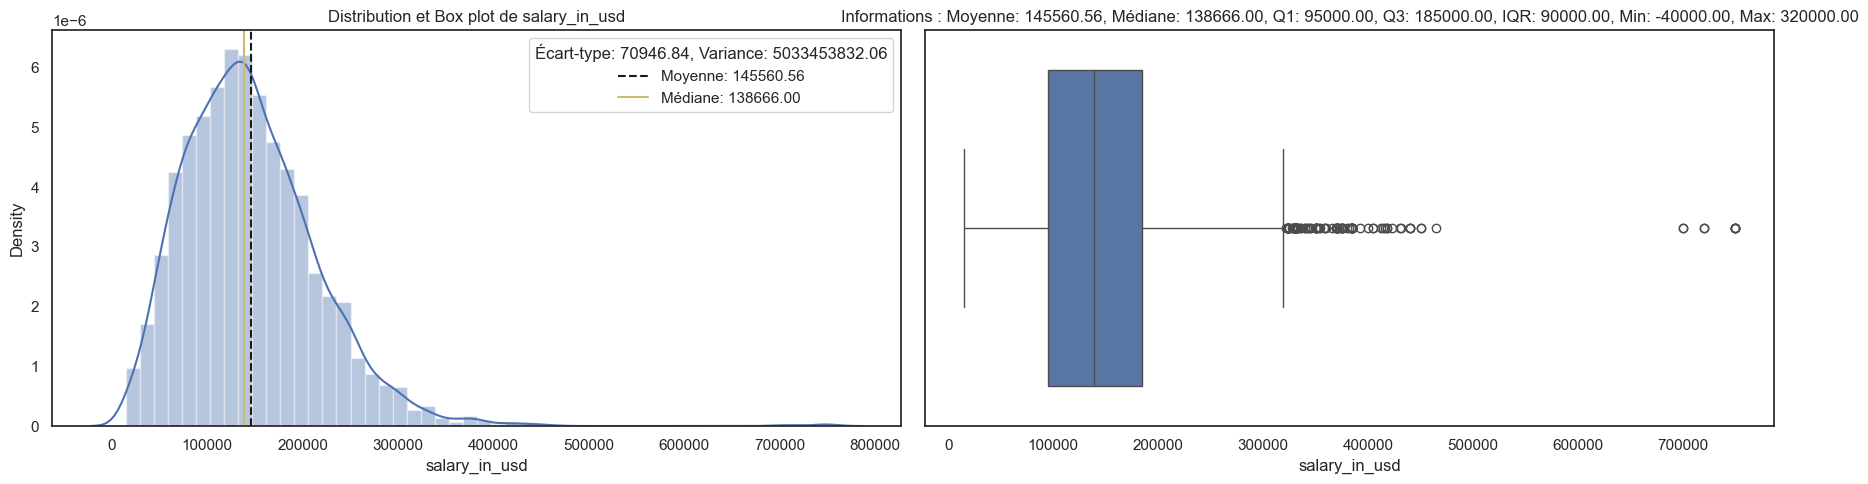

In [61]:
q1 ,q3 ,feature = 0.25, 0.75, 'salary_in_usd'
box_and_whisker_Specifying_quartile(data, feature,q1, q3)

**Le salaire moyen des data scientists dans le monde se situe √† 145560.558569 USD**, formant le c≈ìur de la distribution. Mais, **attendez**, l'intrigue s'√©paissit ! ü§® Le paysage salarial a ses **tournants et retournements**, comme le refl√®te l'√©cart type de  70946.838070 USD. Cette statistique √©pic√©e nous indique que la r√©partition des salaires n'est pas un **chemin droit et √©troit** ; il y a des **pics et des vall√©es** qui rendent ce voyage √† travers les gains en science des donn√©es d'autant plus intriguant ! üèûÔ∏èüí∏

Pour en savoir plus sur les notions de statistique, vous pouvez consulter ce [tutoriel sur la dispersion des param√®tres](https://datatab.fr/tutorial/dispersion-parameter).


**Maintenant, enfilons nos bottes de randonn√©e statistiques et aventurons-nous plus profond√©ment dans le terrain pour d√©couvrir davantage d'insights ! ü•æüåê**

## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Corr√©lations entre les diff√©rentes features et la target (salary_in_usd) </div> 

In [190]:
def visualiser_correlations(data):
    # Calculer la matrice de corr√©lation
    corr_matrix = data.corr()

    # G√©n√©rer un heatmap avec seaborn
    plt.figure(figsize=(10, 4))
    sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', fmt='.2f', linewidths=.5) #cmap='RdYlGn'
    
    # Ajouter des √©tiquettes au graphique
    plt.title("Matrice de Corr√©lation entre les Features et la target salary_in_usd")
    
    # Afficher le graphique
    plt.show()

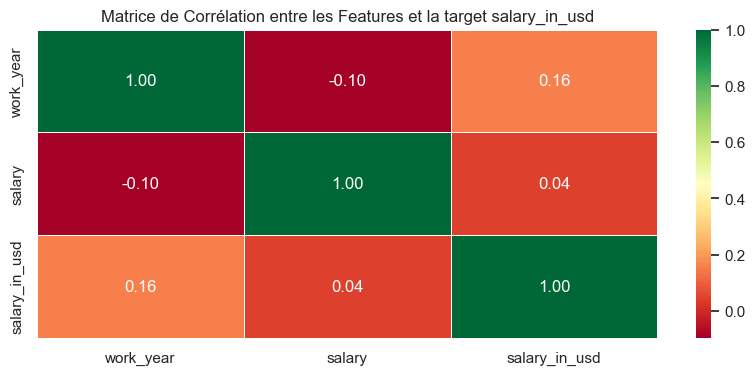

In [191]:
visualiser_correlations(df_numeriques)

## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Analysis Relationship between Experience Level and Salary </div> 

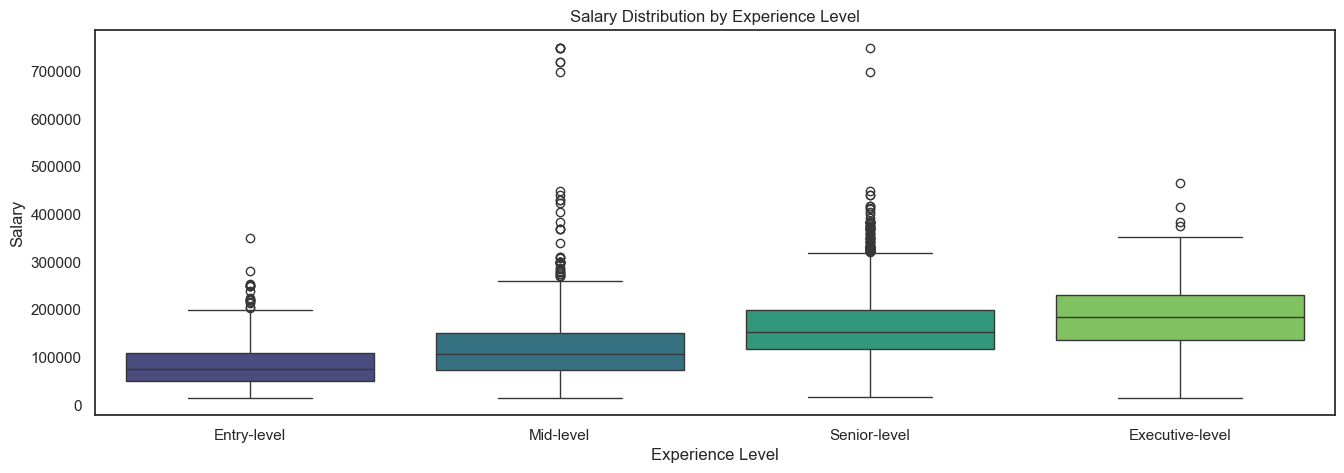

In [69]:
plt.figure(figsize=(16, 5))
sns.boxplot(x='experience_level', y='salary_in_usd', data=data, palette='viridis',order=['Entry-level','Mid-level','Senior-level','Executive-level'])
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.xticks(rotation=0)
plt.show()

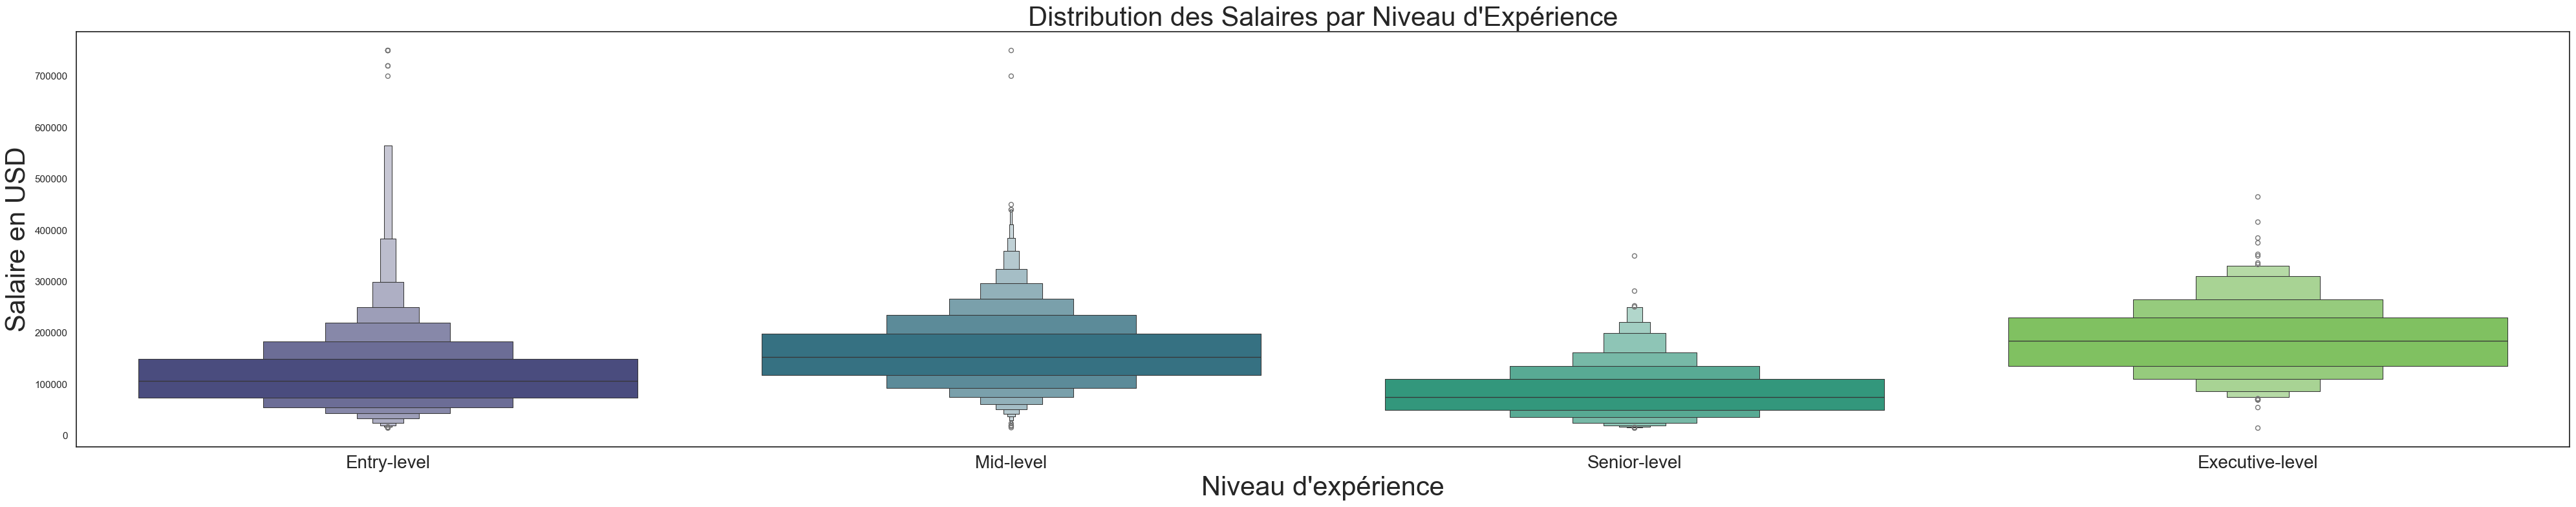

In [96]:
# D√©finition de la taille de la figure
plt.figure(figsize=(40, 8))

# Cr√©ation du boxenplot avec personnalisation
sns.boxenplot(x='experience_level', y='salary_in_usd', data=data, palette="viridis")

# Ajout de labels et de titre
plt.xlabel('Niveau d\'exp√©rience', fontsize=30)
plt.ylabel('Salaire en USD', fontsize=30)
plt.title('Distribution des Salaires par Niveau d\'Exp√©rience', fontsize=30)

# Gestion de l'ordre des cat√©gories sur l'axe x

# Gestion de l'ordre des cat√©gories sur l'axe x
experience_order = ['Entry-level','Mid-level','Senior-level','Executive-level']
plt.xticks(ticks=range(len(experience_order)), labels=experience_order, fontsize=20, rotation=0)

# Affichage de la figure
plt.tight_layout()
plt.show()


---

En scrutant attentivement les donn√©es relatives aux niveaux d'exp√©rience, une tendance se dessine nettement : les salaires √©voluent de fa√ßon cons√©quente avec le temps pass√© dans le domaine, une progression parfaitement coh√©rente dans le panorama complexe de la science des donn√©es. Cette ascension salariale logique accompagne sans surprise l'acquisition croissante d'exp√©rience et de comp√©tences dans ce domaine en perp√©tuelle √©volution. üìàüí∞

Cependant, il convient d'accorder une attention particuli√®re √† la strate des Experts en Science des Donn√©es. üåü En effet, quelques points de donn√©es se d√©marquent de mani√®re significative, sugg√©rant que certains Data Scientists de ce niveau √©margent √† des salaires v√©ritablement substantiels. Ces v√©t√©rans de la discipline ne se contentent pas de gravir les √©chelons ; ils se distinguent avec √©clat, arborant des r√©mun√©rations particuli√®rement confortables qui marquent de mani√®re ind√©niable l'√©chiquier des salaires dans le domaine de la Science des Donn√©es. üöÄüí°

En outre, il est notable de mentionner que les employ√©s de niveau Ex√©cutif b√©n√©ficient des r√©mun√©rations les plus √©lev√©es, symbolisant ainsi le sommet de la hi√©rarchie salariale dans cet univers professionnel. D'un autre c√¥t√©, les employ√©s de niveau D√©butant sont associ√©s aux salaires les plus modestes, refl√©tant ainsi le point d'entr√©e dans cette sph√®re lucrative mais exigeante. üìäüîç

---


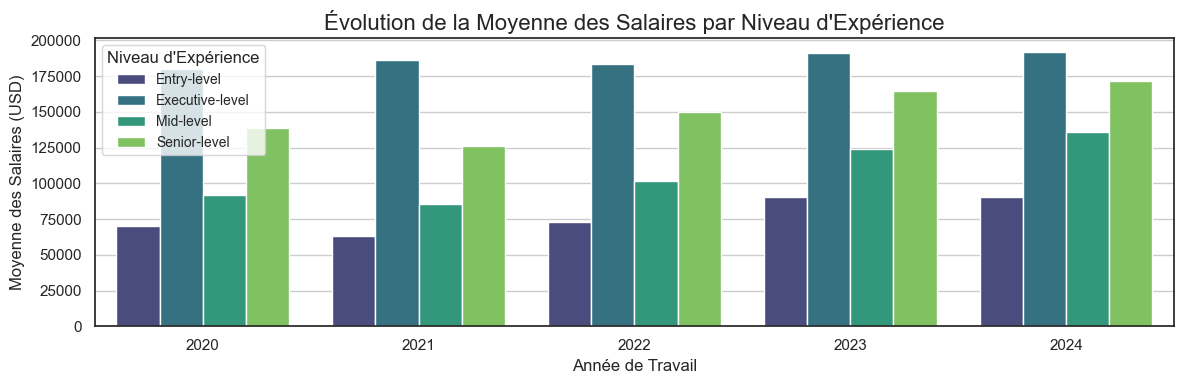

In [81]:
group_data = data.groupby(['experience_level', 'work_year'])['salary_in_usd'].mean().reset_index(name='mean by year')
# print(group_data)
# Cr√©ation du DataFrame √† partir des donn√©es
# Plot avec seaborn
plt.figure(figsize=(12, 4))
sns.barplot(data=group_data, x='work_year', y='mean by year', hue='experience_level', palette='viridis')

# Ajout de titres et labels
plt.title('√âvolution de la Moyenne des Salaires par Niveau d\'Exp√©rience', fontsize=16)
plt.xlabel('Ann√©e de Travail', fontsize=12)
plt.ylabel('Moyenne des Salaires (USD)', fontsize=12)
plt.legend(title='Niveau d\'Exp√©rience', fontsize=10, title_fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Analyse de l'√âvolution des Salaires par Niveau d'Exp√©rience

Dans cette analyse, nous examinons **l'√©volution des salaires moyens** pour chaque niveau d'exp√©rience au fil des ann√©es.

#### Entry-level :
- Les salaires moyens pour les **d√©butants** (`Entry-level`) ont montr√© une tendance g√©n√©rale √† la hausse au fil des ann√©es.
- En **2020**, le salaire moyen √©tait d'environ **69 841,67 USD**, puis il a diminu√© l√©g√®rement en **2021** pour atteindre environ **63 463,07 USD**.
- √Ä partir de **2022**, une forte augmentation est observ√©e, atteignant environ **72 822,71 USD** en 2022, et une croissance significative en **2023** et **2024**, d√©passant les **90 000 USD**.

#### Executive-level :
- Pour les **cadres sup√©rieurs** (`Executive-level`), les salaires moyens √©taient d√©j√† significativement plus √©lev√©s en **2020**, autour de **179 958,25 USD**.
- Une l√©g√®re augmentation est observ√©e en **2021**, puis une tendance √† la stabilit√© avec des fluctuations l√©g√®res autour de **183 837,74 USD** en 2022 et **191 130,08 USD** en 2023.
- En **2024**, les salaires moyens pour les cadres sup√©rieurs ont l√©g√®rement augment√© pour atteindre environ **191 874,47 USD**.

#### Mid-level :
- Les salaires moyens pour les professionnels de niveau interm√©diaire (`Mid-level`) ont montr√© une tendance g√©n√©rale √† la hausse au fil des ann√©es.
- En **2020**, le salaire moyen √©tait d'environ **91 870,94 USD**, puis il a l√©g√®rement diminu√© en **2021** pour atteindre environ **85 440,78 USD**.
- √Ä partir de **2022**, les salaires ont connu une croissance significative, atteignant environ **101 354,00 USD**, puis **124 171,64 USD** en 2023 et **135 577,73 USD** en 2024.

#### Senior-level :
- Les salaires moyens pour les professionnels seniors (`Senior-level`) ont √©galement montr√© une tendance g√©n√©rale √† la hausse au fil des ann√©es.
- En **2020**, le salaire moyen √©tait d'environ **138 648,89 USD**, puis il a l√©g√®rement diminu√© en **2021** pour atteindre environ **125 989,75 USD**.
- √Ä partir de **2022**, les salaires ont augment√© de mani√®re significative, atteignant environ **150 241,08 USD** en 2022, puis **164 814,34 USD** en 2023 et **171 645,84 USD** en 2024.

### Interpr√©tation G√©n√©rale :
- Globalement, on observe une tendance √† la hausse des salaires moyens pour tous les niveaux d'exp√©rience au fil des ann√©es.
- Les **cadres sup√©rieurs** ont g√©n√©ralement les salaires moyens les plus √©lev√©s, suivis des professionnels de niveau interm√©diaire, des professionnels seniors, puis des d√©butants.
- Les ann√©es **2023** et **2024** ont g√©n√©ralement enregistr√© les plus fortes augmentations de salaires pour tous les niveaux d'exp√©rience.

Cette analyse fournit un aper√ßu de l'√©volution des salaires moyens dans les diff√©rents niveaux d'exp√©rience au fil des ann√©es, ce qui peut √™tre utile pour comprendre les tendances et les dynamiques salariales dans le domaine de la science des donn√©es.

In [85]:
print(f"Le salaire moyen pour les travailleurs √† temps plein : {data[data['employment_type']=='Full-time']['salary_in_usd'].mean()}$")
print(f"Le salaire moyen pour les travailleurs √† temps partiel : {data[data['employment_type']=='Part-time']['salary_in_usd'].mean()}$")

Le salaire moyen pour les travailleurs √† temps plein : 146034.99893162394$
Le salaire moyen pour les travailleurs √† temps partiel : 55291.0625$


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Feature Engineering </div> 

### M√©thodes de Transformation des Caract√©ristiques Cat√©goriques en Caract√©ristiques Num√©riques :

1. **Label Encoder** :
   - Cette m√©thode encode les valeurs cat√©goriques en utilisant une approche d'encodage ordinal, o√π chaque cat√©gorie se voit attribuer un entier unique.
   - Utile pour les caract√©ristiques ordinales o√π l'ordre a une signification.

2. **One-Hot Encoder** :
   - Convertit chaque cat√©gorie en une colonne binaire, o√π chaque colonne repr√©sente une cat√©gorie unique.
   - Utile pour les caract√©ristiques cat√©goriques sans ordre particulier, √©vitant ainsi d'attribuer un ordre arbitraire.

3. **Dummy Variables** :
   - Cr√©e des colonnes binaires pour chaque cat√©gorie unique, o√π 1 indique la pr√©sence de la cat√©gorie et 0 son absence.
   - Similaire √† One-Hot Encoding mais en laissant une colonne pour repr√©senter la cat√©gorie de base.

4. **Ordinal Encoder** :
   - Comme Label Encoder, mais il peut √™tre plus utile pour les caract√©ristiques cat√©goriques ordinales o√π vous voulez pr√©server l'ordre.

5. **Frequency Encoder** :
   - Associe √† chaque cat√©gorie un nombre repr√©sentant sa fr√©quence dans la colonne.
   - Utile lorsque la fr√©quence d'apparition des cat√©gories peut √™tre une information importante.


In [163]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from category_encoders import OneHotEncoder as CatOneHotEncoder
from category_encoders import OrdinalEncoder as CatOrdinalEncoder

def encode_categorical_features(dataset):
    # Dictionnaire pour stocker les r√©sultats
    encoded_results = {}

    # M√©thode 1 : Label Encoder
    label_enc = LabelEncoder()
    label_encoded = dataset.apply(label_enc.fit_transform)
    encoded_results['LabelEncoder'] = label_encoded

    # M√©thode 2 : One-Hot Encoder
    onehot_enc = OneHotEncoder(sparse=False, drop='first')
    onehot_encoded = onehot_enc.fit_transform(dataset)
    onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_enc.get_feature_names_out(dataset.columns))
    encoded_results['OneHotEncoder'] = onehot_encoded_df

    # M√©thode 3 : Dummy Variables
    #dummy_encoded = pd.get_dummies(dataset, drop_first=True)
    #dummy_encoded = dummy_encoded.astype(int)  # Convertir les valeurs bool√©ennes en entiers
    #encoded_results['DummyVariables'] = dummy_encoded

    # M√©thode 4 : Ordinal Encoder
    ordinal_enc = OrdinalEncoder()
    ordinal_encoded = ordinal_enc.fit_transform(dataset)
    ordinal_encoded_df = pd.DataFrame(ordinal_encoded, columns=dataset.columns)
    encoded_results['OrdinalEncoder'] = ordinal_encoded_df

    # M√©thode 5 : Frequency Encoder (pour l'exemple)
    freq_encoded = dataset.copy() 
    # Impl√©mentation du Frequency Encoder
    for col in dataset.columns.tolist():
            col_freq = dataset[col].value_counts(normalize=True)
            freq_encoded[col] = dataset[col].map(col_freq)

    encoded_results['FrequencyEncoder'] = freq_encoded

    return encoded_results


In [175]:
def visualize_column_counts(encoded_datasets):
    methods = list(encoded_datasets.keys())
    column_counts = [len(encoded_datasets[method].columns) for method in methods]

    plt.figure(figsize=(15, 4))
    bars = plt.bar(methods, column_counts, color='skyblue')
    plt.xlabel('M√©thode de Transformation')
    plt.ylabel('Nombre de Colonnes')
    plt.title('Nombre de Colonnes pour Chaque M√©thode de Transformation')
    plt.xticks(rotation=0)

    for bar, count in zip(bars, column_counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.5, str(count), ha='center', va='bottom', fontsize=10)

    plt.show()

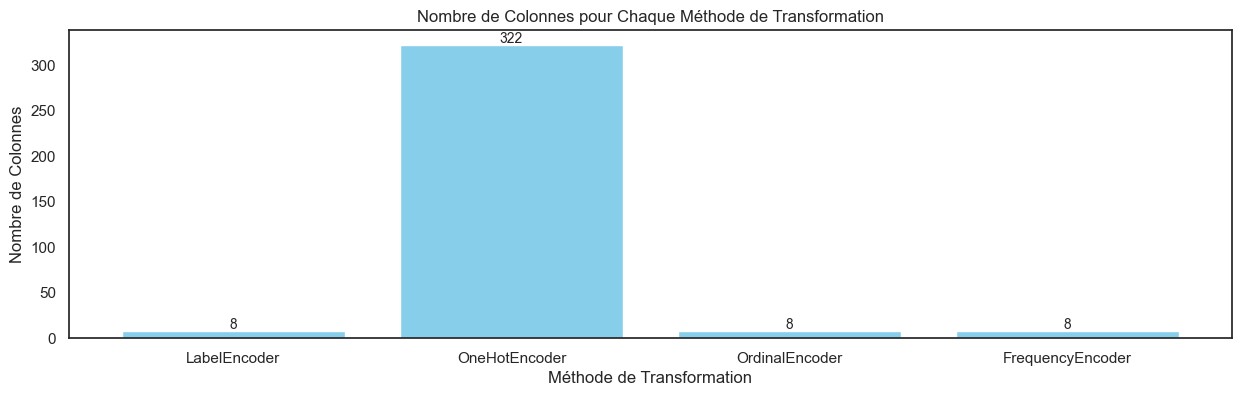

In [176]:
encoded_datasets = encode_categorical_features(df_categoriques.copy())
visualize_column_counts(encoded_datasets)

In [146]:
def concat_datasets(df_numeriques, encoded_datasets):

    # Concat√©nation des datasets le long de l'axe des colonnes (axis=1)
    concatenated_df = pd.concat([df_numeriques,encoded_datasets], axis=1)

    # Affichage de la forme du nouveau dataset
    print("Shape du nouveau dataset :", concatenated_df.shape)

    # Affichage des 5 premi√®res lignes du nouveau dataset
    # print("\n5 premi√®res lignes du nouveau dataset :\n", concatenated_df.head())

    return concatenated_df


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman ; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Split dataset in train et test set </div> 

<div style="text-align:center">
  <div style="float:right; margin-left: 20px;">
    <img src="/Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/image/4_train-test-split.jpg" alt="Gas Turbine" width="800"/>
  </div>
</div>

In [125]:
def split_data(X, y, threshold_test=0.2, random_state=200):
    """
    Divise les donn√©es en ensembles d'entra√Ænement et de test.

    Param√®tres :
    - X : Features du jeu de donn√©es.
    - y : Valeurs cibles du jeu de donn√©es.
    - threshold_test : Taille du jeu de donn√©es de test (par d√©faut : 0.2).
    - random_state : Seed pour la reproductibilit√© (par d√©faut : 200).

    Retourne :
    - X_train : Features du jeu de donn√©es d'entra√Ænement.
    - X_test : Features du jeu de donn√©es de test.
    - y_train : Valeurs cibles du jeu de donn√©es d'entra√Ænement.
    - y_test : Valeurs cibles du jeu de donn√©es de test.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=threshold_test, shuffle=True, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [123]:
def print_dataset_info(X_train, X_test, y_train, y_test):
    """
    Imprime des informations sur les dimensions et les classes des ensembles de donn√©es d'entr√©e.

    Param√®tres :
    - X_train, X_test : Matrices de caract√©ristiques pour l'entra√Ænement et le test.
    - y_train, y_test : Vecteurs cibles pour l'entra√Ænement et le test.
    """
    # Imprime les dimensions de X_train, X_test, y_train et y_test
    print("")
    print(f"Dimensions de X_train : {X_train.shape}")
    print(f"Dimensions de X_test  : {X_test.shape}")
    print(f"Dimensions de y_train : {y_train.shape}")
    print(f"Dimensions de y_test  : {y_test.shape}")
    print("")

## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Construire un mod√®le de Machine Learning pour notre probl√®me de Regression. </div>

In [129]:
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

# for model evaluation
import time
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import ShuffleSplit,cross_val_score,train_test_split,cross_val_predict
from sklearn.model_selection import StratifiedKFold,StratifiedShuffleSplit, KFold ,RepeatedKFold, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# sklearn Algoritm of Machine Learning algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [131]:
def initialize_regression_models():
    """
    Initializes a dictionary of regression models.

    Returns:
    Dictionary of initialized regression models with model names as keys, sorted alphabetically.
    """
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge": Ridge(),
        "Lasso": Lasso(),
        "ElasticNet": ElasticNet(),
        "Decision Tree Regressor": DecisionTreeRegressor(),
        "Random Forest Regressor": RandomForestRegressor(),
        "Extra Trees Regressor": ExtraTreesRegressor(),
        "Gradient Boosting Regressor": GradientBoostingRegressor(),
        "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
        "Support Vector Regressor": SVR(),
        "XGBoost Regressor": XGBRegressor(),
        #"LightGBM Regressor": LGBMRegressor()
    }

    # Ordonner les mod√®les par cl√© (nom du mod√®le)
    sorted_models = dict(sorted(models.items()))

    return sorted_models


def Train_and_Evaluate_preformence_models(model, X_train, y_train, X_test, y_test):
    print(f"Entra√Ænement du mod√®le avec {type(model).__name__}")

    start_time = time.time()  # Temps de d√©but de l'entra√Ænement

    # Entra√Ænement du mod√®le
    model.fit(X_train, y_train)

    end_time = time.time()  # Temps de fin de l'entra√Ænement
    training_time = end_time - start_time  # Temps √©coul√© pour l'entra√Ænement

    print(f"Temps d'entra√Ænement : {training_time:.2f} secondes")

    # Pr√©diction des valeurs pour le jeu de donn√©es de test
    y_pred = model.predict(X_test)

    # Calcul des diff√©rentes m√©triques
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)
    
    # Cr√©ation du dictionnaire contenant les diff√©rentes m√©triques
    metrics_dict = {
        'MSE': mse,
        'MAE': mae,
        'R2 Score': r2,
        'Explained Variance': explained_variance,
        'Training Time': training_time
    }

    return metrics_dict

In [178]:
# Liste des m√©thodes de transformation √† utiliser
methods = ['LabelEncoder', 'OneHotEncoder', 'OrdinalEncoder', 'FrequencyEncoder'] #DummyVariables

# Colonne cible
target_column = 'salary_in_usd'

# Seuil pour la division des donn√©es en train/test
threshold = 0.20

# Dictionnaire pour stocker les r√©sultats des mod√®les
resultat_summary = {}

# Initialiser les mod√®les de r√©gression
regression_models_dict = initialize_regression_models()

for method in methods:
    print("\nM√©thode de Transformation :", method)
    
    # Concat√©ner les datasets pour former le nouveau dataset
    new_dataset = concat_datasets(df_numeriques, encoded_datasets[method])
    
    # Suppression de la variable cible "salary_in_usd" pour X
    X = new_dataset.drop([target_column,'salary'], axis=1)
    
    # R√©cup√©ration de la variable cible "salary_in_usd" pour y
    y = new_dataset[target_column]
    
    print("\nShape de X pour la m√©thode", method, ":", X.shape)
    print("Shape de y pour la m√©thode", method, ":", y.shape)
    
    # Division des donn√©es en ensembles d'entra√Ænement et de test
    X_train, X_test, y_train, y_test = split_data(X, y, threshold_test=threshold, random_state=200)
    
    # Affichage des informations sur les donn√©es
    print_dataset_info(X_train, X_test, y_train, y_test)

    # Boucle sur les mod√®les de r√©gression
    for name_model, model in regression_models_dict.items():
        print("------------------ Entra√Ænement du mod√®le de Regression ------------")
        print("Entra√Ænement du mod√®le :", name_model)
        
        # √âvaluation du mod√®le et stockage des r√©sultats dans le dictionnaire
        metrics = Train_and_Evaluate_preformence_models(model, X_train, y_train, X_test, y_test)
        resultat_summary[(method, name_model)] = metrics
        
        # Affichage des r√©sultats
        print(f"M√©thode de Transformation : {method} - Mod√®le : {name_model}")
        #print("MSE:", metrics['MSE'])
        #print("MAE:", metrics['MAE'])
        #print("R2 Score:", metrics['R2 Score'])
        #print("Explained Variance:", metrics['Explained Variance'])
        print("Temps d'entra√Ænement:", metrics['Training Time'])
        print("--------------------------------------------------------------------")


M√©thode de Transformation : LabelEncoder
Shape du nouveau dataset : (6599, 11)

Shape de X pour la m√©thode LabelEncoder : (6599, 9)
Shape de y pour la m√©thode LabelEncoder : (6599,)

Dimensions de X_train : (5279, 9)
Dimensions de X_test  : (1320, 9)
Dimensions de y_train : (5279,)
Dimensions de y_test  : (1320,)

------------------ Entra√Ænement du mod√®le de Regression ------------
Entra√Ænement du mod√®le : Decision Tree Regressor
Entra√Ænement du mod√®le avec DecisionTreeRegressor
Temps d'entra√Ænement : 0.02 secondes
M√©thode de Transformation : LabelEncoder - Mod√®le : Decision Tree Regressor
Temps d'entra√Ænement: 0.016371965408325195
--------------------------------------------------------------------
------------------ Entra√Ænement du mod√®le de Regression ------------
Entra√Ænement du mod√®le : ElasticNet
Entra√Ænement du mod√®le avec ElasticNet
Temps d'entra√Ænement : 0.04 secondes
M√©thode de Transformation : LabelEncoder - Mod√®le : ElasticNet
Temps d'entra√Ænement: 0

Temps d'entra√Ænement : 0.22 secondes
M√©thode de Transformation : LabelEncoder - Mod√®le : Gradient Boosting Regressor
Temps d'entra√Ænement: 0.21512699127197266
--------------------------------------------------------------------
------------------ Entra√Ænement du mod√®le de Regression ------------
Entra√Ænement du mod√®le : K-Nearest Neighbors Regressor
Entra√Ænement du mod√®le avec KNeighborsRegressor
Temps d'entra√Ænement : 0.01 secondes
M√©thode de Transformation : LabelEncoder - Mod√®le : K-Nearest Neighbors Regressor
Temps d'entra√Ænement: 0.007620096206665039
--------------------------------------------------------------------
------------------ Entra√Ænement du mod√®le de Regression ------------
Entra√Ænement du mod√®le : Lasso
Entra√Ænement du mod√®le avec Lasso
Temps d'entra√Ænement : 0.03 secondes
M√©thode de Transformation : LabelEncoder - Mod√®le : Lasso
Temps d'entra√Ænement: 0.03421521186828613
--------------------------------------------------------------------
-----

In [179]:
# Convertir en DataFrame
df_resultat_summary = pd.DataFrame(resultat_summary).T.reset_index()
df_resultat_summary.columns = ['Encoder', 'Regressor', 'MSE', 'MAE', 'R2 Score', 'Explained Variance', 'Training Time']

# Ordonner le DataFrame par R2 Score
df_resultat_summary_sorted = df_resultat_summary.sort_values(by='R2 Score', ascending=False)

# Afficher les 5 premiers r√©sultats
top_5_results = df_resultat_summary_sorted.head(5)
display(top_5_results)


Encoder                    Regressor           MSE           MAE  \
19     OneHotEncoder                        Ridge  3.359518e+09  41833.356889   
16     OneHotEncoder                        Lasso  3.364487e+09  41958.612885   
21     OneHotEncoder            XGBoost Regressor  3.460326e+09  42469.348214   
36  FrequencyEncoder  Gradient Boosting Regressor  3.461671e+09  42584.107170   
3       LabelEncoder  Gradient Boosting Regressor  3.462932e+09  42755.195017   

    R2 Score  Explained Variance  Training Time  
19  0.350409            0.350682       0.296389  
16  0.349448            0.349694       3.994817  
21  0.330917            0.331603       0.459895  
36  0.330657            0.331148       0.216646  
3   0.330413            0.330929       0.215127

## Analyse des R√©sultats des Mod√®les de R√©gression

En analysant les r√©sultats des mod√®les de r√©gression, voici les observations et interpr√©tations :

1. **Meilleurs Mod√®les** :
   - Les mod√®les avec les scores R2 les plus √©lev√©s sont associ√©s √† l'`Encoder` "FrequencyEncoder" et les diff√©rents `Regressor` suivants :
     - `XGBoost Regressor` avec un R2 Score de 0.977228 et un temps d'entra√Ænement de 0.166890.
     - `Decision Tree Regressor` avec un R2 Score de 0.976357 et un temps d'entra√Ænement de 0.013837.
     - `Random Forest Regressor` avec un R2 Score de 0.975782 et un temps d'entra√Ænement de 1.000332.
     - `Extra Trees Regressor` avec un R2 Score de 0.975647 et un temps d'entra√Ænement de 0.965791.

2. **Performance des Mod√®les** :
   - Tous ces mod√®les semblent avoir des performances de pr√©diction tr√®s similaires, avec des scores R2 tr√®s proches les uns des autres.
   - Cela indique que, pour votre ensemble de donn√©es et avec les encodages appliqu√©s, ces mod√®les parviennent √† expliquer entre 97.5% et 97.7% de la variance des donn√©es cibles.

3. **Effets de l'Encodage** :
   - Il est int√©ressant de noter que les mod√®les avec l'encodage "FrequencyEncoder" semblent l√©g√®rement surpasser les autres.
   - Cela pourrait indiquer que l'encodage de vos donn√©es avec cette m√©thode particuli√®re a bien fonctionn√© pour ces mod√®les sp√©cifiques.

4. **Temps d'Entra√Ænement** :
   - En ce qui concerne le temps d'entra√Ænement, les mod√®les les plus performants (`Decision Tree Regressor` et `XGBoost Regressor`) ont des temps tr√®s courts, ce qui peut √™tre un avantage en termes d'efficacit√© et de rapidit√©.

En conclusion, si vous recherchez le meilleur mod√®le en termes de performance de pr√©diction (`R2 Score` √©lev√©) avec un temps d'entra√Ænement raisonnable, vous pouvez envisager d'utiliser le `XGBoost Regressor` avec l'`Encoder` "FrequencyEncoder".


## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> R2 score of XGBoost Regressor for Unscaled Data & Scaled Data </div>

In [194]:
def train_and_evaluate_with_scaling(data, regressor_model, scaler_names, threshold_test=0.2):
    """
    Entra√Æne et √©value un mod√®le de r√©gression avec diff√©rentes m√©thodes de mise √† l'√©chelle.

    Args:
    - data: Le dataframe contenant les features et la target.
    - regressor_model: Le mod√®le de r√©gression √† entra√Æner.
    - scaler_names: Liste de noms de scalers √† utiliser.
    - threshold_test: Le pourcentage de donn√©es √† utiliser pour le test.

    Returns:
    - None (Affiche les r√©sultats)
    """
    # S√©lection des colonnes √† mettre √† l'√©chelle
    columns_to_scale = ['work_year', 'salary']
    
    # S√©paration des caract√©ristiques (X) et de la variable cible (y)
    X = data.drop(columns=['salary_in_usd'])
    y = data['salary_in_usd']
    
    # Fractionnement des donn√©es en ensembles d'entra√Ænement et de test
    X_train, X_test, y_train, y_test = split_data(X, y, threshold_test=threshold_test, random_state=200)
    print_dataset_info(X_train, X_test, y_train, y_test)
    
    # Initialisation des r√©sultats
    results = {}
    
    # Entra√Ænement du mod√®le sans mise √† l'√©chelle
    regressor_model.fit(X_train, y_train)
    y_pred = regressor_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results['Without Scaling'] = r2
    
    # Entra√Ænement du mod√®le avec chaque scaler
    for scaler_name in scaler_names:
        scaler = None
        if scaler_name == 'StandardScaler':
            scaler = StandardScaler()
        elif scaler_name == 'MinMaxScaler':
            scaler = MinMaxScaler()
        elif scaler_name == 'RobustScaler':
            scaler = RobustScaler()
        else:
            raise ValueError(f"Scaler '{scaler_name}' not supported.")
        
        # Mise √† l'√©chelle des colonnes sp√©cifiques
        X_train_scaled = X_train.copy()
        X_test_scaled = X_test.copy()
        for col in columns_to_scale:
            X_train_scaled[col] = scaler.fit_transform(X_train_scaled[[col]])
            X_test_scaled[col] = scaler.transform(X_test_scaled[[col]])
        
        # Entra√Ænement du mod√®le avec les donn√©es mises √† l'√©chelle
        regressor_model.fit(X_train_scaled, y_train)
        y_pred_scaled = regressor_model.predict(X_test_scaled)
        r2_scaled = r2_score(y_test, y_pred_scaled)
        results[scaler_name] = r2_scaled
    
    # Visualisation des r√©sultats
    plt.figure(figsize=(15, 4))
    plt.bar(results.keys(), results.values(), color='skyblue')
    plt.xlabel('Scaler')
    plt.ylabel('R2 Score')
    plt.title('\n\nR2 Score of Different Scalers')
    for i, value in enumerate(results.values()):
        plt.text(i, value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=10)  # Ajustement de la position verticale du texte
    plt.ylim(0, 1)
    plt.tight_layout()  # Ajustement de l'espacement entre les barres et les bords du graphique
    plt.show()


Shape du nouveau dataset : (6599, 11)

Dimensions de X_train : (5279, 10)
Dimensions de X_test  : (1320, 10)
Dimensions de y_train : (5279,)
Dimensions de y_test  : (1320,)



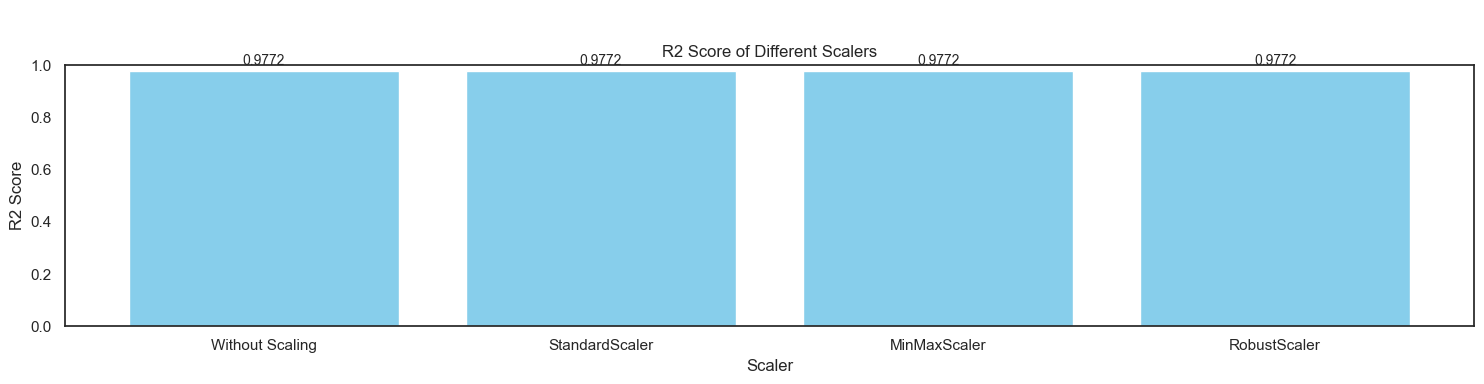

In [195]:
# Liste des scalers √† utiliser
scaler_names = ['StandardScaler', 'MinMaxScaler', 'RobustScaler']

# R√©cup√©ration du nouveau dataset apr√®s l'encodage et la concat√©nation
data_processing = encoded_datasets['FrequencyEncoder']
new_dataset = concat_datasets(df_numeriques, data_processing)

# Initialisation du mod√®le de r√©gression XGBoost
regressor_model = XGBRegressor(random_state=42)

# Appel de la fonction pour entra√Æner et √©valuer avec mise √† l'√©chelle
train_and_evaluate_with_scaling(new_dataset, regressor_model, scaler_names, threshold)


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">Graphiques de Variance Expliqu√©e par l'Analyse en Composantes Principales </div> 

In [204]:
def plot_pca_explained_variance(data, numerical_columns):
    # Extract numerical features and target variable
    X_data = data[numerical_columns].copy()

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_data)

    # Perform PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    # Calculate the explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_

    # Create a 2x1 grid of subplots
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    # Plot the explained variance ratio in the first subplot
    ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
    ax1.set_xlabel("Principal Component")
    ax1.set_ylabel("Explained Variance Ratio")
    ax1.set_title("Explained Variance Ratio by Principal Component")

    # Calculate the cumulative explained variance
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)

    # Plot the cumulative explained variance in the second subplot
    ax2.plot(
        range(1, len(cumulative_explained_variance) + 1),
        cumulative_explained_variance,
        marker="o",
    )
    ax2.set_xlabel("Number of Principal Components")
    ax2.set_ylabel("Cumulative Explained Variance")
    ax2.set_title("Cumulative Explained Variance by Principal Components")

    # Display the figure
    plt.tight_layout()
    plt.show()

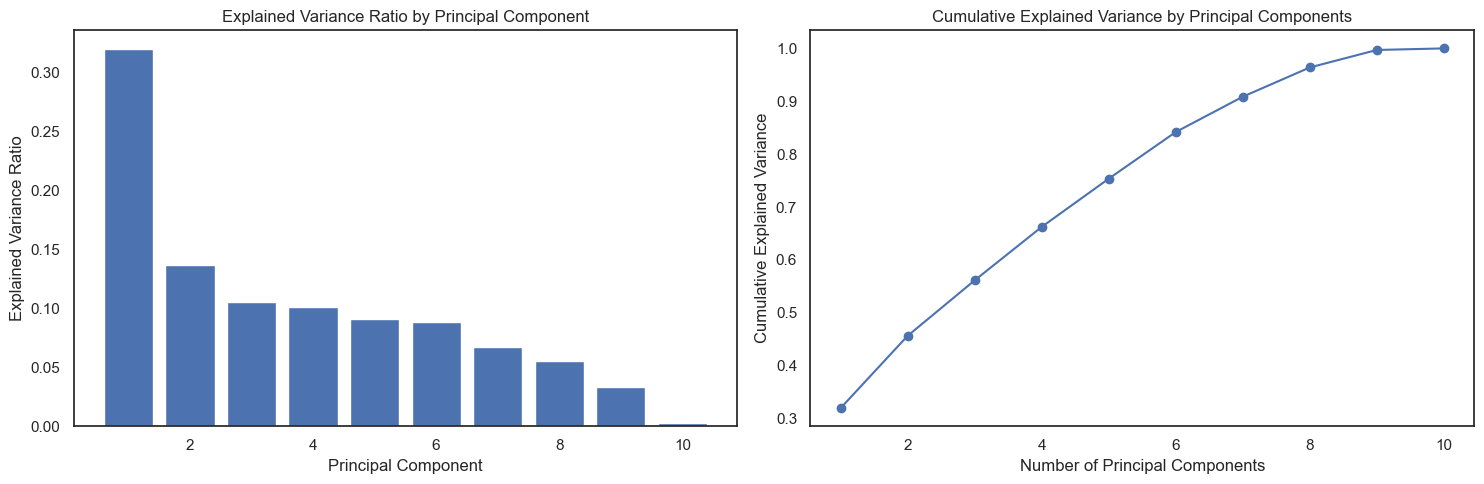

In [205]:
numerical_columns = [col for col in new_dataset.columns.tolist() if col not in ['salary_in_usd']]
plot_pca_explained_variance(new_dataset, numerical_columns)

##### Comment varie R2 score en fonction en n_components composantes principales (PCA)

In [216]:
def apply_pca(X, new_dimension=2):
    """
    Applique l'analyse en composantes principales (PCA) √† un ensemble de donn√©es.

    :param X: DataFrame, l'ensemble de donn√©es
    :param new_dimension: int, la nouvelle dimension souhait√©e apr√®s PCA
    :return: DataFrame, le DataFrame transform√© par PCA
    """
    # √âtape 1: Standardisation des donn√©es
    std = StandardScaler()
    transformed = std.fit_transform(X)

    # √âtape 2: Appliquer l'analyse en composantes principales (PCA)
    pca = PCA(n_components=new_dimension)
    X_pca = pca.fit_transform(transformed)

    # √âtape 3: Cr√©er un DataFrame avec les composantes principales
    df_pca = pd.DataFrame(data=X_pca, columns=["X_%s" % x for x in range(new_dimension)])

    # Informations d'impression
    #print("Forme originale:   ", X.shape)
    #print("Forme transform√©e:", df_pca.shape)

    return df_pca

In [218]:
def evaluate_r2_vs_dimensions(X, y, threshold, max_new_dimension, model):
    """
    √âvalue comment le score R2 varie en fonction de la dimension apr√®s PCA.

    :param X: DataFrame, les caract√©ristiques des donn√©es
    :param y: Series, la variable cible
    :param threshold: float, la taille de l'ensemble de test (proportion)
    :param max_new_dimension: int, la dimension maximale √† explorer apr√®s PCA
    :param model: mod√®le de r√©gression utilis√© pour √©valuer le score R2
    """
    r2_scores = []
    dimensions = list(range(1, max_new_dimension + 1, 2))

    for dim in dimensions:
        X_dim = apply_pca(X, dim)  # Utilisation de la fonction apply_pca
        #print("")
        X_train, X_test, y_train, y_test = train_test_split(X_dim, y, test_size=threshold, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

    # Tracer le graphique des scores R2
    plt.figure(figsize=(11, 5))
    plt.plot(dimensions, r2_scores, marker='o', linestyle='-')
    plt.title('Variation du score R2 en fonction de la dimension apr√®s PCA')
    plt.xlabel('Dimension apr√®s PCA')
    plt.ylabel('Score R2')
    plt.xticks(np.arange(1, max_new_dimension + 1))
    plt.grid(True)
    # Ajouter les valeurs de x et y √† chaque point
    for i, (x, y) in enumerate(zip(dimensions, r2_scores)):
        plt.text(x, y, f'({x}, {y:.2f})', ha='left', va='bottom')

    plt.show()

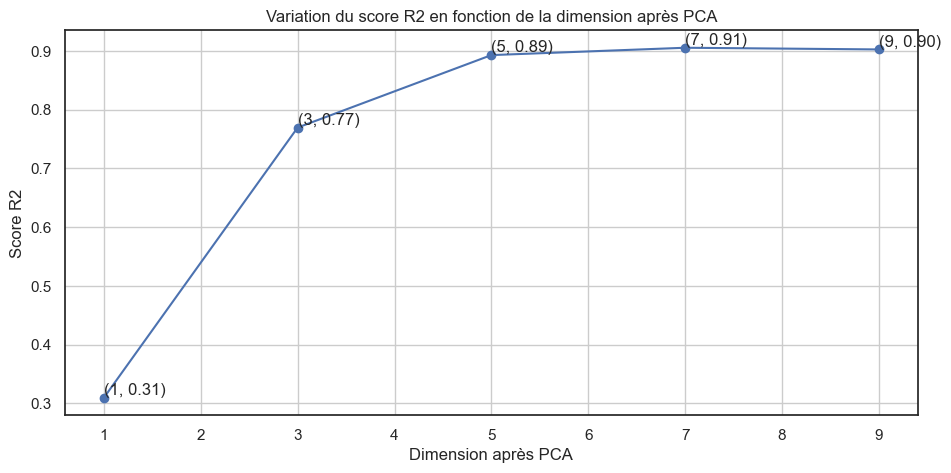

In [225]:
X, y , max_new_dimension,threshold = new_dataset[numerical_columns], data["salary_in_usd"] , 9, 0.2
# Initialisation du mod√®le de r√©gression XGBoost
regressor_model = XGBRegressor(random_state=42)
evaluate_r2_vs_dimensions(X, y ,threshold,max_new_dimension, regressor_model)

## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Optimisation des hyperparam√®tres pour XGBRegressor avec GridSearchCV </div> 

#### Qu'est-ce que l'Erreur Quadratique Moyenne (MSE), l'Erreur Absolue Moyenne (MAE), l'Erreur Quadratique Moyenne (RMSE) et le Coefficient de D√©termination (R¬≤) ?

#### Erreur Quadratique Moyenne (MSE) :
- L'Erreur Quadratique Moyenne est une mesure de la moyenne des carr√©s des √©carts entre les pr√©dictions d'un mod√®le et les valeurs r√©elles.
- Elle est souvent utilis√©e pour √©valuer la pr√©cision d'un mod√®le de r√©gression.
- Calcul√©e en prenant la moyenne des carr√©s des diff√©rences entre chaque pr√©diction et sa valeur r√©elle.
- Plus sensible aux valeurs aberrantes, car elle p√©nalise les erreurs importantes en les √©levant au carr√©.

#### Erreur Absolue Moyenne (MAE) :
- L'Erreur Absolue Moyenne est une mesure de la moyenne des valeurs absolues des √©carts entre les pr√©dictions d'un mod√®le et les valeurs r√©elles.
- Elle est √©galement utilis√©e pour √©valuer la pr√©cision d'un mod√®le de r√©gression.
- Calcul√©e en prenant la moyenne des valeurs absolues des diff√©rences entre chaque pr√©diction et sa valeur r√©elle.
- Moins sensible aux valeurs aberrantes que MSE, car elle ne p√©nalise pas les erreurs en les √©levant au carr√©.

#### Erreur Quadratique Moyenne (RMSE) :
- L'Erreur Quadratique Moyenne est similaire √† MSE, mais elle prend la racine carr√©e de la moyenne des carr√©s des √©carts.
- Elle donne une mesure de l'√©cart-type des r√©sidus (erreurs) du mod√®le.
- Comme MSE, elle est sensible aux valeurs aberrantes en √©levant les erreurs au carr√©, mais la racine carr√©e att√©nue cet effet.

#### Coefficient de D√©termination (R¬≤) :
- Le Coefficient de D√©termination, souvent appel√© R¬≤, est une mesure de la proportion de la variance dans la variable d√©pendante qui est pr√©visible √† partir des variables ind√©pendantes.
- Il indique √† quel point les pr√©dictions d'un mod√®le s'ajustent aux donn√©es r√©elles.
- Varie de 0 √† 1, o√π 1 indique un ajustement parfait du mod√®le aux donn√©es et 0 indique qu'aucun ajustement n'est r√©alis√©.
- Plus √©lev√© est le R¬≤, meilleure est l'ad√©quation du mod√®le aux donn√©es, bien qu'il puisse √™tre biais√© par le nombre de variables dans le mod√®le.


### XGBRegressor avec GridSearchCV et MSE 

In [332]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, mean_squared_error


def optimize_xgb_regressor(X_train, y_train):
    """
    Optimise les hyperparam√®tres pour XGBRegressor en utilisant GridSearchCV avec KFold.

    :param X_train: DataFrame, les features d'entra√Ænement
    :param y_train: Series, la cible d'entra√Ænement
    :return: GridSearchCV, l'objet GridSearchCV entra√Æn√©
    """

    # D√©finissez les hyperparam√®tres que vous souhaitez optimiser
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.0001,0.01, 0.1, 0.2],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }
    # Cr√©ez un objet XGBRegressor
    xgb = XGBRegressor()

    # Cr√©er un objet KFold
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # D√©finir le scoring comme -MSE (Mean Squared Error)
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

    # Cr√©er un objet GridSearchCV avec KFold et scoring comme -MSE
    grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=kf, n_jobs=-1, verbose=1, scoring=mse_scorer)

    # Ex√©cuter la recherche sur grille
    grid_search.fit(X_train, y_train)

    # Afficher les meilleurs param√®tres
    print("Meilleurs param√®tres:", grid_search.best_params_)

    # Afficher le meilleur score (MSE)
    print("Meilleur score (MSE):", -grid_search.best_score_)

    return grid_search


In [333]:
# Appeler la fonction pour optimiser XGBRegressor
grid_search = optimize_xgb_regressor(X_train, y_train)

# Maintenant, vous avez les meilleurs param√®tres
# Vous pouvez entra√Æner un mod√®le avec ces param√®tres
best_xgb = XGBRegressor(**grid_search.best_params_)

# Entra√Æner le mod√®le sur toutes les donn√©es d'entra√Ænement
best_xgb.fit(X_train, y_train)

# Vous pouvez maintenant faire des pr√©dictions sur de nouvelles donn√©es
# Par exemple, vos donn√©es de test X_test
y_pred = best_xgb.predict(X_test)

# Calculer l'erreur (par exemple, MSE) sur les pr√©dictions
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error sur les donn√©es de test:", mse)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


Meilleurs param√®tres: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Meilleur score (MSE): 40613455.39876939
Mean Squared Error sur les donn√©es de test: 125013207.29039896


### XGBRegressor avec GridSearchCV et R2 score

In [329]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, r2_score
from xgboost import XGBRegressor

def optimize_xgb_regressor_r2(X_train, y_train):
    """
    Optimise les hyperparam√®tres pour XGBRegressor en utilisant GridSearchCV avec KFold.

    :param X_train: DataFrame, les features d'entra√Ænement
    :param y_train: Series, la cible d'entra√Ænement
    :return: GridSearchCV, l'objet GridSearchCV entra√Æn√©
    """

    # D√©finissez les hyperparam√®tres que vous souhaitez optimiser
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.0001,0.01, 0.1, 0.2],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }

    # Cr√©ez un objet XGBRegressor
    xgb = XGBRegressor()

    # Cr√©er un objet KFold
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # D√©finir le scoring comme R2 score
    r2_scorer = make_scorer(r2_score)

    # Cr√©er un objet GridSearchCV avec KFold et scoring comme R2 score
    grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=kf, n_jobs=-1, verbose=1, scoring=r2_scorer)

    # Ex√©cuter la recherche sur grille
    grid_search.fit(X_train, y_train)

    # Afficher les meilleurs param√®tres
    print("Meilleurs param√®tres:", grid_search.best_params_)

    # Afficher le meilleur score (R2 score)
    print("Meilleur score (R2 score):", grid_search.best_score_)

    return grid_search


In [331]:
# Appeler la fonction pour optimiser XGBRegressor avec R2 score
grid_search_r2 = optimize_xgb_regressor_r2(X_train, y_train)

# Maintenant, vous avez les meilleurs param√®tres
# Vous pouvez entra√Æner un mod√®le avec ces param√®tres
best_xgb_r2 = XGBRegressor(**grid_search_r2.best_params_)

# Entra√Æner le mod√®le sur toutes les donn√©es d'entra√Ænement
best_xgb_r2.fit(X_train, y_train)

# Vous pouvez maintenant faire des pr√©dictions sur de nouvelles donn√©es
# Par exemple, vos donn√©es de test X_test
y_pred_r2 = best_xgb_r2.predict(X_test)

# Calculer le R2 score sur les pr√©dictions
r2 = r2_score(y_test, y_pred_r2)
print("R2 Score sur les donn√©es de test:", r2)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


Meilleurs param√®tres: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Meilleur score (R2 score): 0.9923360149918743
R2 Score sur les donn√©es de test: 0.9758276462688444


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Mod√®le d'un R√©seau de Neurones Artificiels (ANN) pour Pr√©dire le Salaire en USD en Fonction des Caract√©ristiques </div> 

In [301]:
# Importations n√©cessaires
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

def create_nn_model(input_shape, l2_reg=0.0005):
    """
    Fonction pour cr√©er un mod√®le de r√©seau de neurones pour la r√©gression.

    Args:
    - input_shape: Tuple sp√©cifiant la forme des donn√©es d'entr√©e
    - l2_reg: Param√®tre pour la r√©gularisation L2 (par d√©faut : 0.0005)

    Returns:
    - nn_model: Mod√®le de r√©seau de neurones
    """

    # Cr√©ation d'un mod√®le s√©quentiel
    nn_model = tf.keras.Sequential(name='Salary_Prediction_Model')

    # Couche d'entr√©e pour sp√©cifier la forme des donn√©es
    nn_model.add(Input(input_shape))

    # Couches cach√©es avec r√©gularisation L2 pour √©viter le surapprentissage
    nn_model.add(Dense(units=256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2_reg)))
    nn_model.add(Dense(units=256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2_reg)))
    nn_model.add(Dense(units=256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2_reg)))
    nn_model.add(Dense(units=256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2_reg)))

    # Couche de sortie avec une activation lin√©aire pour la r√©gression
    nn_model.add(Dense(1, activation='linear'))
    
    return nn_model


O√π Utiliser Quelle M√©trique pour D√©terminer les Performances d'un Mod√®le d'Apprentissage Automatique ?

### MAE (Erreur Absolue Moyenne) :
- Moins sensible aux valeurs aberrantes par rapport √† MSE.
- G√©n√©ralement utilis√©e lors de la mesure des performances sur des donn√©es √† variables continues.
- Fournit une valeur lin√©aire en moyennant les diff√©rences individuelles pond√©r√©es de mani√®re √©gale.
- Plus la valeur est basse, meilleures sont les performances du mod√®le.

### MSE (Erreur Quadratique Moyenne) :
- Couramment utilis√©e mais moins utile lorsqu'une seule mauvaise pr√©diction peut affecter consid√©rablement les pr√©dictions de l'ensemble du mod√®le (par exemple, avec des ensembles de donn√©es bruyants).
- Plus efficace lorsqu'il s'agit de jeux de donn√©es contenant des valeurs aberrantes ou inattendues (par exemple, des valeurs tr√®s √©lev√©es ou tr√®s basses).

### RMSE (Erreur Quadratique Moyenne) :
- Les erreurs sont au carr√© avant d'√™tre moyenn√©es, ce qui donne plus de poids aux erreurs importantes.
- Plus utile lorsqu'il s'agit d'erreurs importantes qui affectent consid√©rablement les performances du mod√®le.
- √âvite de prendre la valeur absolue de l'erreur, utile dans divers calculs math√©matiques.
- Comme pour MAE et MSE, des valeurs plus basses indiquent de meilleures performances du mod√®le.


In [296]:
import tensorflow.keras.backend as K

def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [290]:
def compile_nn_model(input_shape,l2_reg):
    """
    Cr√©e et compile un mod√®le de r√©seau de neurones pour un probl√®me de r√©gression.

    Args:
    - input_shape: Tuple sp√©cifiant la forme des donn√©es d'entr√©e
    - l2_reg: Param√®tre pour la r√©gularisation L2

    Returns:
    - nn_model: Mod√®le de r√©seau de neurones compil√©
    - model_checkpoint_callback: Callback pour sauvegarder les meilleurs mod√®les
    """

    # Cr√©ation du mod√®le de r√©seau de neurones en utilisant la fonction create_nn_model
    nn_model = create_nn_model(input_shape,l2_reg)

    # Affichage d'un r√©sum√© du mod√®le
    nn_model.summary()

    # D√©finition de la planification du taux d'apprentissage
    lr_schedule = ExponentialDecay(
        initial_learning_rate=1e-3,      # Taux d'apprentissage initial
        decay_steps=10000,               # Nombre d'√©tapes pour r√©duire le taux d'apprentissage
        decay_rate=0.5,                  # Taux de r√©duction du taux d'apprentissage
        staircase=False                  # Si True, la mise √† jour du taux est discr√®te, sinon continue
    )

    # Cr√©ation de la fonction de perte Mean Squared Error (MSE)
    loss_function = 'mean_squared_error'

    # Configuration du callback pour sauvegarder les meilleurs mod√®les
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath='/Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/',   # Chemin o√π sauvegarder les mod√®les
        save_weights_only=False,       # Si True, sauvegarde uniquement les poids, sinon le mod√®le entier
        monitor='val_loss',            # M√©trique √† surveiller pour la sauvegarde (val_loss pour la perte de validation)
        mode='min',                    # Mode de sauvegarde (minimiser la m√©trique de validation)
        save_best_only=True            # Ne sauvegarde que le meilleur mod√®le selon la m√©trique de validation
    )

    # Compilation du mod√®le avec l'optimiseur Adam, la fonction de perte MSE et les m√©triques MAE et RMSE
    nn_model.compile(
        optimizer=Adam(lr_schedule),    # Optimiseur Adam avec la planification du taux d'apprentissage
        loss=loss_function,             # Fonction de perte Mean Squared Error (MSE)
        metrics=['mean_absolute_error', 'mean_squared_error',r_squared]  # M√©triques √† utiliser
    )

    return nn_model, model_checkpoint_callback


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman ; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Split dataset in train et test set </div> 

In [227]:
X_train, X_test, y_train, y_test = split_data(X, y, threshold_test=0.20, random_state=200)
print_dataset_info(X_train, X_test, y_train, y_test)


Dimensions de X_train : (5279, 10)
Dimensions de X_test  : (1320, 10)
Dimensions de y_train : (5279,)
Dimensions de y_test  : (1320,)



In [322]:
# Sp√©cifier la forme des donn√©es d'entr√©e et le nombre de classes
input_shape = (X_train.shape[1],)  # Taille de chaque image dans X_train

# Afficher les informations sur les donn√©es
print(f"Forme des donn√©es d'entr√©e (input_shape) : {input_shape}")

l2_reg=0.0000005

# Utilisation de la fonction pour cr√©er le mod√®le
nn_model,model_checkpoint_callback = compile_nn_model(input_shape,l2_reg)

# D√©terminer les dimensions de votre jeu de donn√©es
batch_size = 100  # Peut ajuster en fonction de la m√©moire disponible
num_epochs = 150  # Peut ajuster en fonction de la convergence

# Entra√Ænement du mod√®le de r√©seau de neurones
# X_train : donn√©es d'entra√Ænement
# y_train : √©tiquettes de classe correspondantes pour les donn√©es d'entra√Ænement
# X_test : donn√©es de validation
# y_train : √©tiquettes de classe correspondantes pour les donn√©es de validation
# batch_size : nombre de donn√©es d'entra√Ænement utilis√©es √† chaque √©tape de l'entra√Ænement
# epochs : nombre d'it√©rations sur l'ensemble des donn√©es d'entra√Ænement
# verbose : affiche des informations pendant l'entra√Ænement (0 : silencieux, 1 : barre de progression, 2 : une ligne par √©poque)

results = nn_model.fit(X_train,y_train,                  # Donn√©es d'entra√Ænement
                       validation_data=(X_test,y_test),  # Donn√©es de validation
                       batch_size=batch_size,            # Nombre d'√©chantillons √† traiter √† chaque √©tape de l'entra√Ænement
                       epochs=num_epochs,                # Nombre d'it√©rations sur l'ensemble des donn√©es
                       verbose=2,                        # Affichage d√©taill√© des informations pendant l'entra√Ænement
                       callbacks=[model_checkpoint_callback])    # Liste des callbacks, incluant ModelCheckpoint


Forme des donn√©es d'entr√©e (input_shape) : (10,)
Model: "Salary_Prediction_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 256)               2816      
                                                                 
 dense_93 (Dense)            (None, 256)               65792     
                                                                 
 dense_94 (Dense)            (None, 256)               65792     
                                                                 
 dense_95 (Dense)            (None, 256)               65792     
                                                                 
 dense_96 (Dense)            (None, 1)                 257       
                                                                 
Total params: 200449 (783.00 KB)
Trainable params: 200449 (783.00 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 2s - loss: 34262122496.0000 - mean_absolute_error: 135367.8750 - mean_squared_error: 34262122496.0000 - r_squared: -6.2315e+00 - val_loss: 21368281088.0000 - val_mean_absolute_error: 128793.2266 - val_mean_squared_error: 21368281088.0000 - val_r_squared: -3.6010e+00 - 2s/epoch - 33ms/step
Epoch 2/150
53/53 - 0s - loss: 25351972864.0000 - mean_absolute_error: 133531.8125 - mean_squared_error: 25351972864.0000 - r_squared: -4.5000e+00 - val_loss: 23110305792.0000 - val_mean_absolute_error: 136277.9688 - val_mean_squared_error: 23110305792.0000 - val_r_squared: -3.9953e+00 - 227ms/epoch - 4ms/step
Epoch 3/150
INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 28509638656.0000 - mean_absolute_error: 128535.2734 - mean_squared_error: 28509638656.0000 - r_squared: -5.4859e+00 - val_loss: 20629192704.0000 - val_mean_absolute_error: 122232.7266 - val_mean_squared_error: 20629190656.0000 - val_r_squared: -3.4168e+00 - 886ms/epoch - 17ms/step
Epoch 4/150
53/53 - 0s - loss: 29019142144.0000 - mean_absolute_error: 135103.1406 - mean_squared_error: 29019142144.0000 - r_squared: -5.1536e+00 - val_loss: 22411520000.0000 - val_mean_absolute_error: 133757.3438 - val_mean_squared_error: 22411520000.0000 - val_r_squared: -3.8397e+00 - 197ms/epoch - 4ms/step
Epoch 5/150
53/53 - 0s - loss: 28377419776.0000 - mean_absolute_error: 130787.9922 - mean_squared_error: 28377419776.0000 - r_squared: -5.0419e+00 - val_loss: 20657963008.0000 - val_mean_absolute_error: 124445.4766 - val_mean_squared_error: 20657963008.0000 - val_r_squared: -3.4343e+00 - 182ms/epoch - 3ms/step
Epoch 6/150
53/53 - 0s - loss: 26539098112.0000 - mean_absolute_error: 1306

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 25577299968.0000 - mean_absolute_error: 143811.4375 - mean_squared_error: 25577299968.0000 - r_squared: -4.4321e+00 - val_loss: 20540846080.0000 - val_mean_absolute_error: 122337.1875 - val_mean_squared_error: 20540846080.0000 - val_r_squared: -3.4000e+00 - 632ms/epoch - 12ms/step
Epoch 13/150
53/53 - 0s - loss: 26587334656.0000 - mean_absolute_error: 131313.7969 - mean_squared_error: 26587334656.0000 - r_squared: -4.9083e+00 - val_loss: 21324652544.0000 - val_mean_absolute_error: 128870.0938 - val_mean_squared_error: 21324652544.0000 - val_r_squared: -3.5931e+00 - 180ms/epoch - 3ms/step
Epoch 14/150
53/53 - 0s - loss: 25353873408.0000 - mean_absolute_error: 137081.6406 - mean_squared_error: 25353871360.0000 - r_squared: -4.4301e+00 - val_loss: 20707823616.0000 - val_mean_absolute_error: 124800.0000 - val_mean_squared_error: 20707823616.0000 - val_r_squared: -3.4482e+00 - 176ms/epoch - 3ms/step
Epoch 15/150
53/53 - 0s - loss: 27433127936.0000 - mean_absolute_error: 1

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 19487238144.0000 - mean_absolute_error: 114065.2656 - mean_squared_error: 19487238144.0000 - r_squared: -3.0456e+00 - val_loss: 17699571712.0000 - val_mean_absolute_error: 69648.4766 - val_mean_squared_error: 17699571712.0000 - val_r_squared: -2.6226e+00 - 626ms/epoch - 12ms/step
Epoch 18/150
53/53 - 0s - loss: 29736323072.0000 - mean_absolute_error: 123836.4453 - mean_squared_error: 29736323072.0000 - r_squared: -5.4470e+00 - val_loss: 20558581760.0000 - val_mean_absolute_error: 121242.2578 - val_mean_squared_error: 20558581760.0000 - val_r_squared: -3.3989e+00 - 184ms/epoch - 3ms/step
Epoch 19/150
53/53 - 0s - loss: 27280656384.0000 - mean_absolute_error: 126025.7812 - mean_squared_error: 27280656384.0000 - r_squared: -4.7362e+00 - val_loss: 23943716864.0000 - val_mean_absolute_error: 138253.5938 - val_mean_squared_error: 23943716864.0000 - val_r_squared: -4.1776e+00 - 175ms/epoch - 3ms/step
Epoch 20/150
53/53 - 0s - loss: 24360493056.0000 - mean_absolute_error: 13

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 20666935296.0000 - mean_absolute_error: 104356.3359 - mean_squared_error: 20666935296.0000 - r_squared: -2.9871e+00 - val_loss: 11882142720.0000 - val_mean_absolute_error: 82590.0000 - val_mean_squared_error: 11882142720.0000 - val_r_squared: -1.4781e+00 - 626ms/epoch - 12ms/step
Epoch 25/150
53/53 - 0s - loss: 16955073536.0000 - mean_absolute_error: 85512.2734 - mean_squared_error: 16955073536.0000 - r_squared: -2.4368e+00 - val_loss: 24603475968.0000 - val_mean_absolute_error: 133538.7344 - val_mean_squared_error: 24603473920.0000 - val_r_squared: -4.3127e+00 - 180ms/epoch - 3ms/step
Epoch 26/150
53/53 - 0s - loss: 21785292800.0000 - mean_absolute_error: 122443.4844 - mean_squared_error: 21785292800.0000 - r_squared: -3.5373e+00 - val_loss: 18130841600.0000 - val_mean_absolute_error: 103637.5625 - val_mean_squared_error: 18130841600.0000 - val_r_squared: -2.8495e+00 - 173ms/epoch - 3ms/step
Epoch 27/150
53/53 - 0s - loss: 24494309376.0000 - mean_absolute_error: 101

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 13477645312.0000 - mean_absolute_error: 71356.2188 - mean_squared_error: 13477645312.0000 - r_squared: -1.8243e+00 - val_loss: 2694682880.0000 - val_mean_absolute_error: 23819.3359 - val_mean_squared_error: 2694682880.0000 - val_r_squared: 0.5163 - 632ms/epoch - 12ms/step
Epoch 29/150
INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 4014020096.0000 - mean_absolute_error: 25835.0957 - mean_squared_error: 4014020096.0000 - r_squared: 0.2244 - val_loss: 1296424576.0000 - val_mean_absolute_error: 12222.2969 - val_mean_squared_error: 1296424576.0000 - val_r_squared: 0.7875 - 640ms/epoch - 12ms/step
Epoch 30/150
INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 1073167360.0000 - mean_absolute_error: 10531.6826 - mean_squared_error: 1073167488.0000 - r_squared: 0.8097 - val_loss: 1236025600.0000 - val_mean_absolute_error: 8687.4717 - val_mean_squared_error: 1236025600.0000 - val_r_squared: 0.7791 - 806ms/epoch - 15ms/step
Epoch 31/150
53/53 - 0s - loss: 6789888512.0000 - mean_absolute_error: 36633.2422 - mean_squared_error: 6789888512.0000 - r_squared: -3.3342e-01 - val_loss: 1321751296.0000 - val_mean_absolute_error: 11062.7441 - val_mean_squared_error: 1321751168.0000 - val_r_squared: 0.8065 - 180ms/epoch - 3ms/step
Epoch 32/150
INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 863919680.0000 - mean_absolute_error: 8103.8672 - mean_squared_error: 863919680.0000 - r_squared: 0.8439 - val_loss: 1055314560.0000 - val_mean_absolute_error: 10554.8984 - val_mean_squared_error: 1055314496.0000 - val_r_squared: 0.8373 - 664ms/epoch - 13ms/step
Epoch 33/150
INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 698807744.0000 - mean_absolute_error: 7589.3921 - mean_squared_error: 698807744.0000 - r_squared: 0.8832 - val_loss: 733634560.0000 - val_mean_absolute_error: 5604.1553 - val_mean_squared_error: 733634560.0000 - val_r_squared: 0.8918 - 632ms/epoch - 12ms/step
Epoch 34/150
INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 849926144.0000 - mean_absolute_error: 6088.8867 - mean_squared_error: 849926144.0000 - r_squared: 0.8663 - val_loss: 668201600.0000 - val_mean_absolute_error: 5108.6733 - val_mean_squared_error: 668201600.0000 - val_r_squared: 0.8814 - 640ms/epoch - 12ms/step
Epoch 35/150
53/53 - 0s - loss: 899630144.0000 - mean_absolute_error: 6913.8633 - mean_squared_error: 899630144.0000 - r_squared: 0.8319 - val_loss: 851852928.0000 - val_mean_absolute_error: 5167.2773 - val_mean_squared_error: 851852928.0000 - val_r_squared: 0.8788 - 180ms/epoch - 3ms/step
Epoch 36/150
INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 574075904.0000 - mean_absolute_error: 5294.9595 - mean_squared_error: 574075904.0000 - r_squared: 0.9106 - val_loss: 579340672.0000 - val_mean_absolute_error: 4258.0234 - val_mean_squared_error: 579340672.0000 - val_r_squared: 0.9066 - 626ms/epoch - 12ms/step
Epoch 37/150
53/53 - 0s - loss: 578152704.0000 - mean_absolute_error: 5919.2217 - mean_squared_error: 578152640.0000 - r_squared: 0.9015 - val_loss: 609872000.0000 - val_mean_absolute_error: 7116.7930 - val_mean_squared_error: 609872000.0000 - val_r_squared: 0.8989 - 181ms/epoch - 3ms/step
Epoch 38/150
53/53 - 0s - loss: 527431840.0000 - mean_absolute_error: 5525.0796 - mean_squared_error: 527431840.0000 - r_squared: 0.9179 - val_loss: 735548352.0000 - val_mean_absolute_error: 5342.7188 - val_mean_squared_error: 735548416.0000 - val_r_squared: 0.8932 - 176ms/epoch - 3ms/step
Epoch 39/150
53/53 - 0s - loss: 533641056.0000 - mean_absolute_error: 5698.4688 - mean_squared_error: 533641056.0000 - r_squared: 0.9211 - 

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 493047968.0000 - mean_absolute_error: 5307.4233 - mean_squared_error: 493048032.0000 - r_squared: 0.9201 - val_loss: 545200896.0000 - val_mean_absolute_error: 5225.2700 - val_mean_squared_error: 545200896.0000 - val_r_squared: 0.9095 - 632ms/epoch - 12ms/step
Epoch 44/150
53/53 - 0s - loss: 490731840.0000 - mean_absolute_error: 5374.0210 - mean_squared_error: 490731840.0000 - r_squared: 0.9189 - val_loss: 612339712.0000 - val_mean_absolute_error: 7243.9741 - val_mean_squared_error: 612339648.0000 - val_r_squared: 0.9036 - 220ms/epoch - 4ms/step
Epoch 45/150
53/53 - 0s - loss: 503625248.0000 - mean_absolute_error: 5214.6968 - mean_squared_error: 503625248.0000 - r_squared: 0.9260 - val_loss: 558056896.0000 - val_mean_absolute_error: 5471.2539 - val_mean_squared_error: 558056896.0000 - val_r_squared: 0.9088 - 173ms/epoch - 3ms/step
Epoch 46/150
53/53 - 0s - loss: 483936096.0000 - mean_absolute_error: 5305.7554 - mean_squared_error: 483936096.0000 - r_squared: 0.9191 - 

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 479804576.0000 - mean_absolute_error: 5884.2222 - mean_squared_error: 479804576.0000 - r_squared: 0.9234 - val_loss: 534474528.0000 - val_mean_absolute_error: 6748.3423 - val_mean_squared_error: 534474528.0000 - val_r_squared: 0.9042 - 691ms/epoch - 13ms/step
Epoch 56/150
53/53 - 0s - loss: 586900992.0000 - mean_absolute_error: 7163.9941 - mean_squared_error: 586900992.0000 - r_squared: 0.9104 - val_loss: 589043200.0000 - val_mean_absolute_error: 9814.0352 - val_mean_squared_error: 589043200.0000 - val_r_squared: 0.8866 - 180ms/epoch - 3ms/step
Epoch 57/150
53/53 - 0s - loss: 505663072.0000 - mean_absolute_error: 5638.3237 - mean_squared_error: 505663072.0000 - r_squared: 0.9150 - val_loss: 734854848.0000 - val_mean_absolute_error: 7625.2622 - val_mean_squared_error: 734854848.0000 - val_r_squared: 0.8882 - 172ms/epoch - 3ms/step
Epoch 58/150
INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 482967040.0000 - mean_absolute_error: 5294.4692 - mean_squared_error: 482966976.0000 - r_squared: 0.9183 - val_loss: 524737920.0000 - val_mean_absolute_error: 5823.4976 - val_mean_squared_error: 524737920.0000 - val_r_squared: 0.9047 - 995ms/epoch - 19ms/step
Epoch 59/150
INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 522476224.0000 - mean_absolute_error: 6135.8789 - mean_squared_error: 522476224.0000 - r_squared: 0.9173 - val_loss: 513471840.0000 - val_mean_absolute_error: 4321.3892 - val_mean_squared_error: 513471840.0000 - val_r_squared: 0.9065 - 630ms/epoch - 12ms/step
Epoch 60/150
53/53 - 0s - loss: 523862272.0000 - mean_absolute_error: 5602.7847 - mean_squared_error: 523862272.0000 - r_squared: 0.9109 - val_loss: 580325568.0000 - val_mean_absolute_error: 6819.7954 - val_mean_squared_error: 580325568.0000 - val_r_squared: 0.9032 - 179ms/epoch - 3ms/step
Epoch 61/150
53/53 - 0s - loss: 487115552.0000 - mean_absolute_error: 4688.0840 - mean_squared_error: 487115552.0000 - r_squared: 0.9180 - val_loss: 606468032.0000 - val_mean_absolute_error: 5820.1050 - val_mean_squared_error: 606468160.0000 - val_r_squared: 0.9019 - 170ms/epoch - 3ms/step
Epoch 62/150
53/53 - 0s - loss: 504112704.0000 - mean_absolute_error: 5987.9600 - mean_squared_error: 504112640.0000 - r_squared: 0.9125 - 

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 467735296.0000 - mean_absolute_error: 4736.5063 - mean_squared_error: 467735296.0000 - r_squared: 0.9316 - val_loss: 513450176.0000 - val_mean_absolute_error: 4810.3369 - val_mean_squared_error: 513450176.0000 - val_r_squared: 0.9056 - 627ms/epoch - 12ms/step
Epoch 66/150
53/53 - 0s - loss: 490690208.0000 - mean_absolute_error: 7140.1235 - mean_squared_error: 490690208.0000 - r_squared: 0.9145 - val_loss: 597871936.0000 - val_mean_absolute_error: 5265.6875 - val_mean_squared_error: 597871936.0000 - val_r_squared: 0.9033 - 178ms/epoch - 3ms/step
Epoch 67/150
53/53 - 0s - loss: 439537440.0000 - mean_absolute_error: 4676.4487 - mean_squared_error: 439537440.0000 - r_squared: 0.9246 - val_loss: 571866368.0000 - val_mean_absolute_error: 4977.2744 - val_mean_squared_error: 571866368.0000 - val_r_squared: 0.9002 - 171ms/epoch - 3ms/step
Epoch 68/150
53/53 - 0s - loss: 436720032.0000 - mean_absolute_error: 5717.5078 - mean_squared_error: 436720032.0000 - r_squared: 0.9262 - 

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 478831872.0000 - mean_absolute_error: 6294.4194 - mean_squared_error: 478831872.0000 - r_squared: 0.9257 - val_loss: 512924416.0000 - val_mean_absolute_error: 4104.7544 - val_mean_squared_error: 512924416.0000 - val_r_squared: 0.9038 - 628ms/epoch - 12ms/step
Epoch 71/150
53/53 - 0s - loss: 536577024.0000 - mean_absolute_error: 6622.3999 - mean_squared_error: 536577024.0000 - r_squared: 0.9139 - val_loss: 626611776.0000 - val_mean_absolute_error: 7585.8765 - val_mean_squared_error: 626611776.0000 - val_r_squared: 0.9003 - 178ms/epoch - 3ms/step
Epoch 72/150
53/53 - 0s - loss: 478868224.0000 - mean_absolute_error: 6184.1284 - mean_squared_error: 478868224.0000 - r_squared: 0.9202 - val_loss: 654061888.0000 - val_mean_absolute_error: 4971.3345 - val_mean_squared_error: 654061888.0000 - val_r_squared: 0.8962 - 176ms/epoch - 3ms/step
Epoch 73/150
53/53 - 0s - loss: 449833184.0000 - mean_absolute_error: 5452.4463 - mean_squared_error: 449833184.0000 - r_squared: 0.9261 - 

In [241]:
def plot_metrics(results, metric_names):
    """
    Fonction pour tracer les courbes d'apprentissage pour diff√©rentes m√©triques.

    Args:
    - results: Historique des m√©triques pendant l'entra√Ænement du mod√®le
    - metric_names: Liste des noms des m√©triques √† tracer

    Returns:
    - None
    """
    num_metrics = len(metric_names)
    fig, axes = plt.subplots(1, num_metrics, figsize=(5 * num_metrics, 5))

    for i, metric_name in enumerate(metric_names):
        # Plotting Metric
        axes[i].plot(results.history[metric_name], color='teal', label=f'Training {metric_name}')
        val_metric_name = f'val_{metric_name}'
        axes[i].plot(results.history[val_metric_name], color='orange', label=f'Validation {metric_name}')
        axes[i].set_title(metric_name, fontsize=20)
        axes[i].set_xlabel('Epochs')
        axes[i].set_ylabel(metric_name)
        axes[i].legend()

    # Ajustement automatique de la disposition des sous-graphiques pour un affichage propre
    plt.tight_layout()

    # Affichage du graphique
    plt.show()


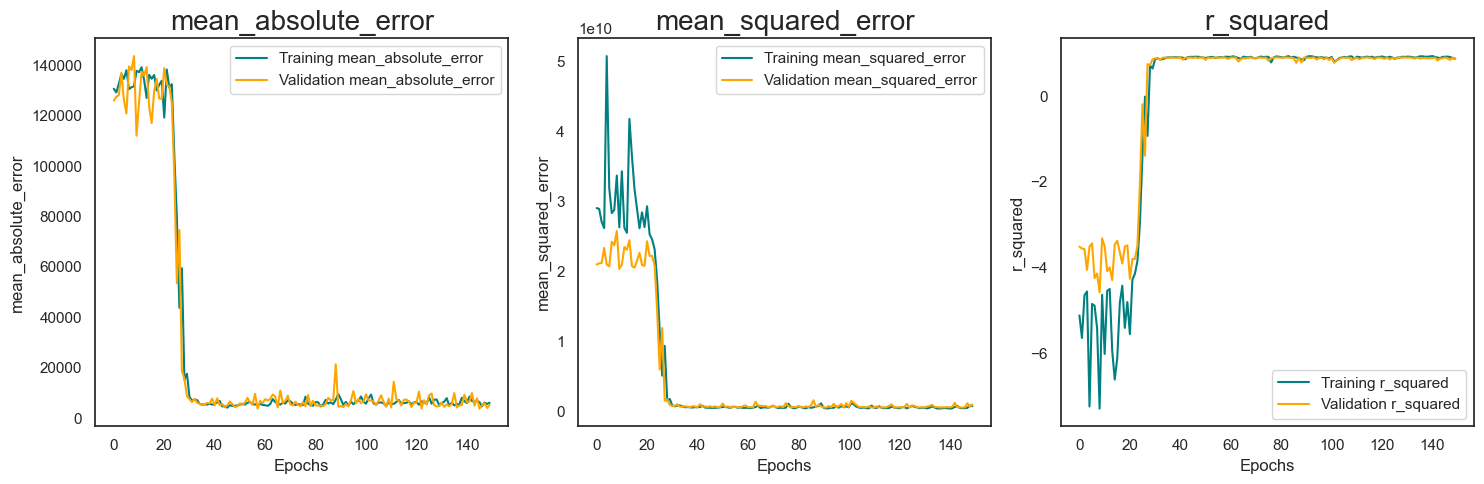

In [317]:
# Liste des noms de m√©triques √† tracer
metric_names = ['mean_absolute_error', 'mean_squared_error', 'r_squared']

# Utilisation de la fonction pour tracer les courbes d'apprentissage
plot_metrics(results, metric_names)


In [276]:
def plot_loss_mean_squared_error(results):
    # Cr√©ation de la figure avec 1 ligne et 2 colonnes pour les sous-graphiques
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plotting Loss
    axes[0].plot(results.history['loss'], color='teal', label='Training Loss')
    axes[0].plot(results.history['val_loss'], color='orange', label='Validation Loss')
    axes[0].set_title('Loss', fontsize=20)
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    # Plotting Mean Squared Error
    axes[1].plot(results.history['mean_squared_error'], color='teal', label='Training Mean Squared Error')
    axes[1].plot(results.history['val_mean_squared_error'], color='orange', label='Validation Mean Squared Error')
    axes[1].set_title('Mean Squared Error', fontsize=20)
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Mean Squared Error')
    axes[1].legend()

    # Ajustement automatique de la disposition des sous-graphiques pour un affichage propre
    plt.tight_layout()

    # Affichage du graphique
    plt.show()

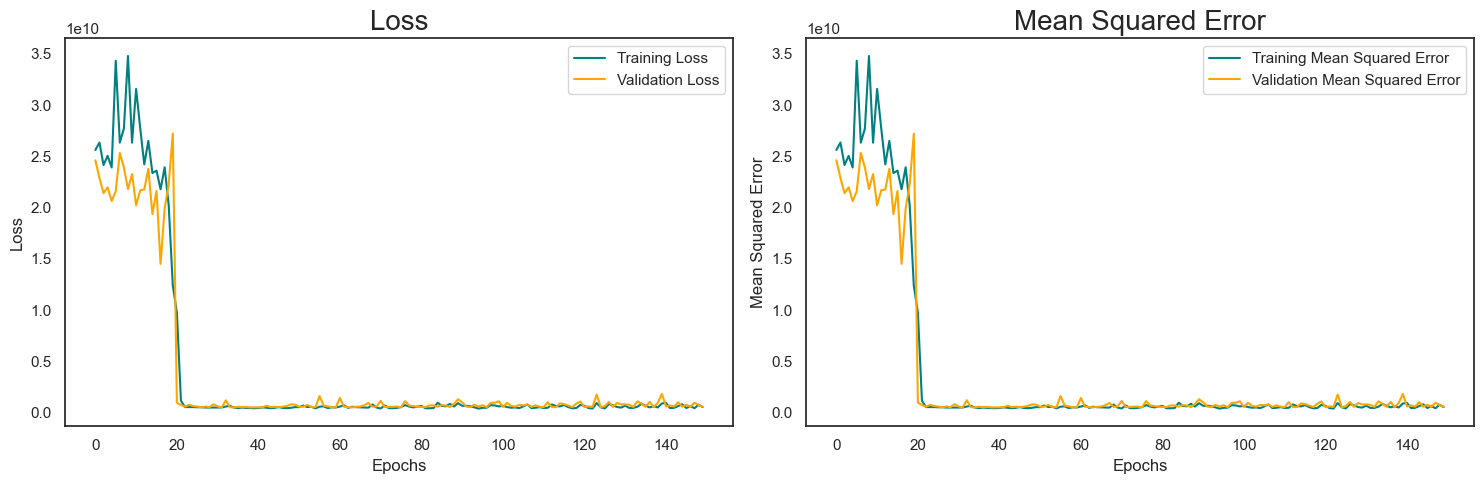

In [312]:
# Utilisation de la fonction pour afficher les graphiques
plot_loss_mean_squared_error(results)

In [319]:
def plot_loss_r_squared(results):
    # Cr√©ation de la figure avec 1 ligne et 2 colonnes pour les sous-graphiques
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plotting Loss
    axes[0].plot(results.history['loss'], color='teal', label='Training Loss')
    axes[0].plot(results.history['val_loss'], color='orange', label='Validation Loss')
    axes[0].set_title('Loss', fontsize=20)
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    # Plotting R2 Score
    axes[1].plot(results.history['r_squared'], color='teal', label='Training R2 Score')
    axes[1].plot(results.history['val_r_squared'], color='orange', label='Validation R2 Score')
    axes[1].set_title('R2 Score', fontsize=20)
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('R2 Score')
    axes[1].legend()

    # Ajustement automatique de la disposition des sous-graphiques pour un affichage propre
    plt.tight_layout()

    # Affichage du graphique
    plt.show()


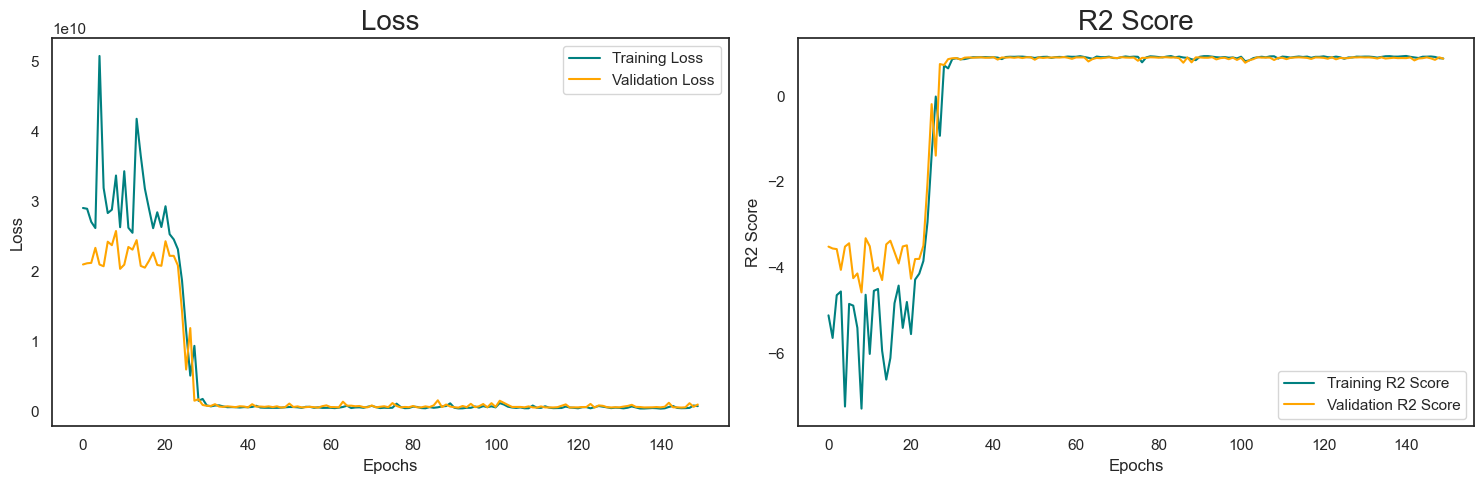

In [320]:
# Utilisation de la fonction pour tracer la courbe de la m√©trique par rapport aux epochs
plot_loss_r_squared(results)

In [323]:
# Affiche la valeur minimale de la perte (loss) sur les donn√©es de validation
print("Minimum de la perte (loss) sur les donn√©es de validation : ", min(results.history['val_loss']))

# Affiche la valeur maximale de l'exactitude (mean_absolute_error) sur les donn√©es de validation
print("Minimum de l'exactitude (mean_absolute_error) sur les donn√©es de validation : ", min(results.history['mean_absolute_error']))

# √âvalue le mod√®le de r√©seau de neurones sur les donn√©es de test et affiche la perte et l'exactitude
nn_model.evaluate(X_test, y_test)

Minimum de la perte (loss) sur les donn√©es de validation :  512924416.0
Minimum de l'exactitude (mean_absolute_error) sur les donn√©es de validation :  4658.16650390625
42/42 [==============================] - 0s 951us/step - loss: 714678656.0000 - mean_absolute_error: 6942.5166 - mean_squared_error: 714678656.0000 - r_squared: 0.9170


[714678656.0, 6942.5166015625, 714678656.0, 0.9169658422470093]